In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
customer = pd.read_csv("CUSTOMERS.csv")
location = pd.read_csv("GEO_LOCATION.csv")
item = pd.read_csv("ORDER_ITEMS.csv")
payment = pd.read_csv("ORDER_PAYMENTS.csv")
rating = pd.read_csv("ORDER_REVIEW_RATINGS.csv")
order = pd.read_csv("ORDERS.csv")
product = pd.read_csv("PRODUCTS.csv")
seller = pd.read_csv("SELLERS.csv")

In [3]:
df = payment.merge(order,on="order_id")
df = rating.merge(df,on="order_id")
df = df.merge(item, how = 'left', on = 'order_id')
df = seller.merge(df, how = 'left', on = 'seller_id')
df = product.merge(df, how = 'left', on = 'product_id')
df = customer.merge(df, how = 'left', on = 'customer_id')
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,a9516a079e37a9c9c36b9b78b10169e8,Office_Furniture,41.0,1141.0,1.0,...,delivered,5/16/2017 15:05,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,1.0,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,4aa6014eceb682077f9dc4bffebc05b0,Housewares,43.0,1002.0,3.0,...,delivered,1/12/2018 20:48,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,1.0,1/18/2018 20:58,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,bd07b66896d6f1494f5b86251848ced7,Office_Furniture,55.0,955.0,1.0,...,delivered,5/19/2018 16:07,5/20/2018 16:19,6/11/2018 14:31,6/14/2018 17:58,6/13/2018 0:00,1.0,6/5/2018 16:19,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,a5647c44af977b148e0a3a4751a09e2e,Office_Furniture,48.0,1066.0,1.0,...,delivered,3/13/2018 16:06,3/13/2018 17:29,3/27/2018 23:22,3/28/2018 16:04,4/10/2018 0:00,1.0,3/27/2018 16:31,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,9391a573abe00141c56e38d84d7d5b3b,Home_Confort,61.0,407.0,1.0,...,delivered,7/29/2018 9:51,7/29/2018 10:10,7/30/2018 15:16,8/9/2018 20:55,8/15/2018 0:00,1.0,7/31/2018 10:10,230.00,22.25


In [4]:
df.shape

(119091, 37)

In [5]:
df.drop(columns=[ 'product_name_lenght','product_description_lenght','product_photos_qty', 'product_weight_g',
        'product_length_cm', 'product_height_cm', 'product_width_cm','seller_zip_code_prefix','order_approved_at',
        'order_delivered_carrier_date','order_estimated_delivery_date','order_delivered_customer_date','shipping_limit_date'
        ,'payment_sequential','review_creation_date','review_answer_timestamp' ,'payment_installments'], inplace=True)

In [6]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_id',
       'product_category_name', 'seller_id', 'seller_city', 'seller_state',
       'review_id', 'order_id', 'review_score', 'payment_type',
       'payment_value', 'order_status', 'order_purchase_timestamp',
       'order_item_id', 'price', 'freight_value'],
      dtype='object')

In [7]:
df.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 20
product_id                  32951
product_category_name          71
seller_id                    3095
seller_city                   534
seller_state                   19
review_id                   98452
order_id                    98665
review_score                    5
payment_type                    4
payment_value               28938
order_status                    7
order_purchase_timestamp    88156
order_item_id                  21
price                        5968
freight_value                6999
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119091 entries, 0 to 119090
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_id               119091 non-null  object 
 1   customer_unique_id        119091 non-null  object 
 2   customer_zip_code_prefix  119091 non-null  int64  
 3   customer_city             119091 non-null  object 
 4   customer_state            119091 non-null  object 
 5   product_id                118315 non-null  object 
 6   product_category_name     116581 non-null  object 
 7   seller_id                 118315 non-null  object 
 8   seller_city               116664 non-null  object 
 9   seller_state              116664 non-null  object 
 10  review_id                 118315 non-null  object 
 11  order_id                  118315 non-null  object 
 12  review_score              118315 non-null  float64
 13  payment_type              118315 non-null  o

In [9]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,seller_id,seller_city,seller_state,review_id,order_id,review_score,payment_type,payment_value,order_status,order_purchase_timestamp,order_item_id,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,a9516a079e37a9c9c36b9b78b10169e8,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,88b8b52d46df026a9d1ad2136a59b30b,00e7ee1b050b8499577073aeb2a297a1,4.0,credit_card,146.87,delivered,5/16/2017 15:05,1.0,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,4aa6014eceb682077f9dc4bffebc05b0,Housewares,b8bc237ba3788b23da09c0f1f3a3288c,Sadasivpet,Andhra Pradesh,02fc48a9efa3e3d0f1a8ea26507eeec3,29150127e6685892b6eab3eec79f59c7,5.0,credit_card,335.48,delivered,1/12/2018 20:48,1.0,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,bd07b66896d6f1494f5b86251848ced7,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,5ad6695d76ee186dc473c42706984d87,b2059ed67ce144a36e2aa97d2c9e9ad2,5.0,credit_card,157.73,delivered,5/19/2018 16:07,1.0,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,a5647c44af977b148e0a3a4751a09e2e,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,059a801bb31f6aab2266e672cab87bc5,951670f92359f4fe4a63112aa7306eba,5.0,credit_card,173.30,delivered,3/13/2018 16:06,1.0,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,9391a573abe00141c56e38d84d7d5b3b,Home_Confort,4a3ca9315b744ce9f8e9374361493884,Tarsali,Gujarat,8490879d58d6c5d7773f2739a03f089a,6b7d50bd145f6fc7f33cebabd7e49d0f,5.0,credit_card,252.25,delivered,7/29/2018 9:51,1.0,230.00,22.25


### Correcting DataType

In [11]:
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"],format="%m/%d/%Y %H:%M")
df["order_purchase_timestamp"] = df["order_purchase_timestamp"].dt.strftime("%d-%m-%Y")
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"],format="%d-%m-%Y")

In [12]:
df.drop_duplicates(inplace=True)

### Checking Missing Percentage

In [14]:
na = df.isna().sum()
num=df.shape[0]
null_val = (na/num)*100
print(null_val)

customer_id                 0.000000
customer_unique_id          0.000000
customer_zip_code_prefix    0.000000
customer_city               0.000000
customer_state              0.000000
product_id                  0.655411
product_category_name       2.095457
seller_id                   0.655411
seller_city                 2.043092
seller_state                2.043092
review_id                   0.655411
order_id                    0.655411
review_score                0.655411
payment_type                0.655411
payment_value               0.655411
order_status                0.655411
order_purchase_timestamp    0.655411
order_item_id               0.655411
price                       0.655411
freight_value               0.655411
dtype: float64


### As we can see that none of the columns have missing value percentage more than 5%. Thus, we will replace categorial variable missing values with its mode and numerical variable values with column mean.

In [16]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
categorial_columns = df.select_dtypes(include=['object'])
num_col = numerical_columns.columns
cat_col = categorial_columns.columns
[df[i].fillna(value= round(df[i].mean(),2), inplace=True) for i in num_col]
[df[i].fillna(value= df[i].mode().item(), inplace=True) for i in cat_col]
df.isna().sum()

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\550670701.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  [df[i].fillna(value= round(df[i].mean(),2), inplace=True) for i in num_col]
C:\Users\dell\AppData\Local\Temp\ipykernel_20244\550670701.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

customer_id                   0
customer_unique_id            0
customer_zip_code_prefix      0
customer_city                 0
customer_state                0
product_id                    0
product_category_name         0
seller_id                     0
seller_city                   0
seller_state                  0
review_id                     0
order_id                      0
review_score                  0
payment_type                  0
payment_value                 0
order_status                  0
order_purchase_timestamp    776
order_item_id                 0
price                         0
freight_value                 0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118399 entries, 0 to 119090
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   customer_id               118399 non-null  object        
 1   customer_unique_id        118399 non-null  object        
 2   customer_zip_code_prefix  118399 non-null  int64         
 3   customer_city             118399 non-null  object        
 4   customer_state            118399 non-null  object        
 5   product_id                118399 non-null  object        
 6   product_category_name     118399 non-null  object        
 7   seller_id                 118399 non-null  object        
 8   seller_city               118399 non-null  object        
 9   seller_state              118399 non-null  object        
 10  review_id                 118399 non-null  object        
 11  order_id                  118399 non-null  object        
 12  review_

In [18]:
df.describe()

,customer_zip_code_prefix,review_score,payment_value,order_purchase_timestamp,order_item_id,price,freight_value
count,118399.000000,118399.000000,118399.000000,117623,118399.000000,118399.000000,118399.000000
mean,35052.192932,4.014432,173.395282,2017-12-29 19:27:42.134106368,1.196583,120.632599,20.020207
min,1003.000000,1.000000,0.000000,2016-09-04 00:00:00,1.000000,0.850000,0.000000
25%,11310.000000,4.000000,61.760000,2017-09-11 00:00:00,1.000000,39.900000,13.080000
50%,24315.000000,5.000000,109.710000,2018-01-18 00:00:00,1.000000,75.000000,16.320000
75%,58700.500000,5.000000,189.070000,2018-05-03 00:00:00,1.000000,132.900000,21.150000
max,99990.000000,5.000000,13664.080000,2018-09-03 00:00:00,21.000000,6735.000000,409.680000
std,29824.840815,1.395759,266.763413,NaN,0.697828,183.517002,15.757733


### Perform Detailed exploratory analysis

a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total
products, Total categories, Total sellers, Total locations, Total channels, Total
payment methods etc…)

In [21]:
print("Total Revenue : {}".format(df["payment_value"].sum()))
print("Total Quantity : {}".format(df["order_item_id"].count()))
print("Total Product : {}".format(df["product_id"].nunique()))
print("Total Categories : {}".format(df["product_category_name"].nunique()))
print("Total Seller : {}".format(df["seller_id"].nunique()))
print("Total Channels and Payment Methods : {}".format(df["payment_type"].nunique()))
print("Total Locations : {}".format(df["customer_zip_code_prefix"].nunique()))

Total Revenue : 20529828.03
Total Quantity : 118399
Total Product : 32951
Total Categories : 71
Total Seller : 3095
Total Channels and Payment Methods : 4
Total Locations : 14994



b. Understanding how many new customers acquired every month

In [23]:
df["order_month"] = df["order_purchase_timestamp"].dt.to_period('M')

New customers acquired every months are :     order_month  count
0      2016-12      1
1      2016-09      2
2      2016-10    305
3      2017-01    754
4      2017-02   1705
5      2017-04   2339
6      2017-03   2595
7      2017-06   3114
8      2017-05   3560
9      2017-07   3843
10     2017-09   4090
11     2017-08   4149
12     2017-10   4412
13     2017-12   5442
14     2018-06   5934
15     2018-07   6054
16     2018-08   6238
17     2018-02   6422
18     2018-05   6604
19     2018-04   6709
20     2018-03   6947
21     2018-01   6983
22     2017-11   7217


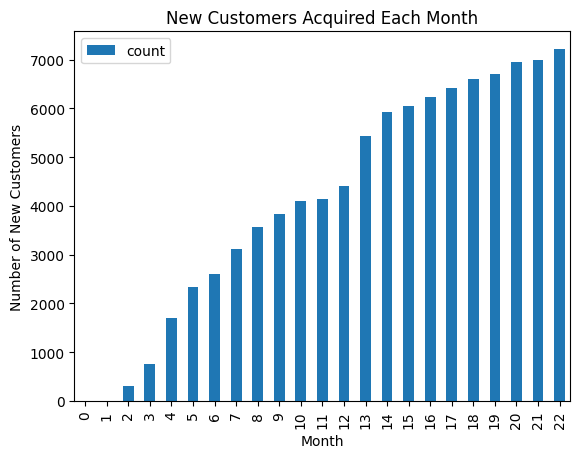

In [24]:
b = df.groupby("customer_unique_id")[["order_month"]].min()
data = b["order_month"].value_counts(ascending=True).reset_index()
print("New customers acquired every months are : ",data)
data.sort_index().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('New Customers Acquired Each Month')
plt.show()

In [25]:
data["count"].mean().round(2)

4148.65

There are average of 4148 customers every month.

c. Understand the retention of customers on month on month basis

In [28]:
temp_data = df.loc[:, ['customer_unique_id', 'order_month']] 
temp_data.drop_duplicates('customer_unique_id' , inplace= True)
temp_data.head()

,customer_unique_id,order_month
0,861eff4711a542e4b93843c6dd7febb0,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05
3,259dac757896d24d7702b9acbbff3f3c,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,2018-07


In [29]:
customer_monthly_data = temp_data.groupby('order_month')[['customer_unique_id']].count().reset_index()
customer_monthly_data.head()

,order_month,customer_unique_id
0,2016-09,2
1,2016-10,299
2,2017-01,739
3,2017-02,1681
4,2017-03,2554


In [30]:
new_monthly_data = df.groupby('order_month')[['customer_unique_id']].count()
new_monthly_data.head()

,customer_unique_id
order_month,
2016-09,3
2016-10,385
2016-12,1
2017-01,1018
2017-02,2052


In [31]:
retented_data = pd.merge(new_monthly_data , customer_monthly_data , how= 'left' , on ="order_month")
retented_data["customer_unique_id_y"].fillna(0,inplace=True)
retented_data

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\3014524482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  retented_data["customer_unique_id_y"].fillna(0,inplace=True)


,order_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,3,2.0
1,2016-10,385,299.0
2,2016-12,1,0.0
3,2017-01,1018,739.0
4,2017-02,2052,1681.0
5,2017-03,3184,2554.0
6,2017-04,2847,2305.0
7,2017-05,4418,3495.0
8,2017-06,3805,3076.0
9,2017-07,4817,3812.0


In [32]:
retented_data['retented_cust'] = retented_data.customer_unique_id_x - retented_data.customer_unique_id_y
retented_data

,order_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,3,2.0,1.0
1,2016-10,385,299.0,86.0
2,2016-12,1,0.0,1.0
3,2017-01,1018,739.0,279.0
4,2017-02,2052,1681.0,371.0
5,2017-03,3184,2554.0,630.0
6,2017-04,2847,2305.0,542.0
7,2017-05,4418,3495.0,923.0
8,2017-06,3805,3076.0,729.0
9,2017-07,4817,3812.0,1005.0


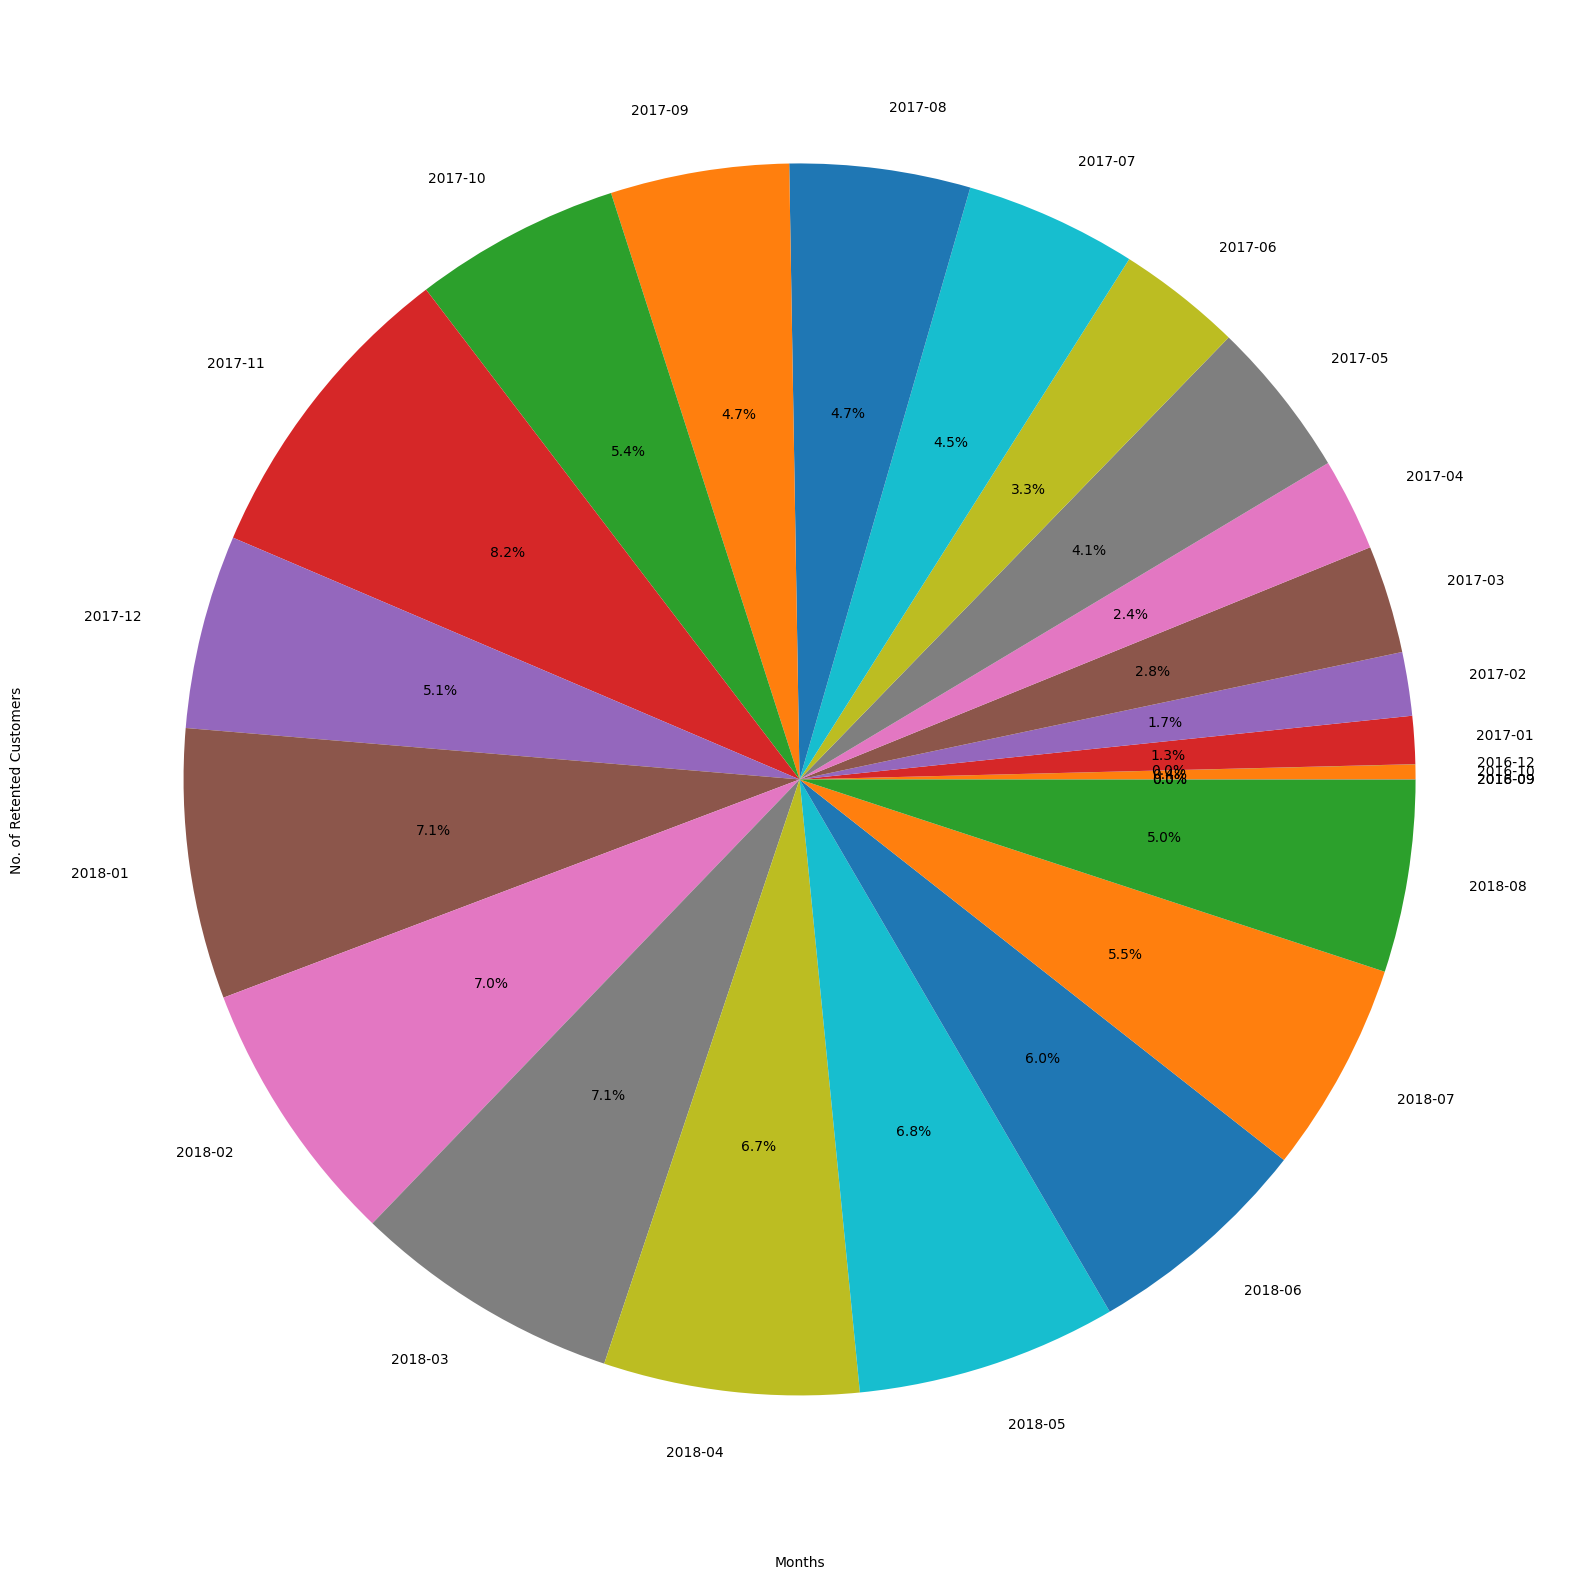

In [33]:
plt.figure(figsize=(20,20))
plt.pie(retented_data['retented_cust'],autopct='%1.1f%%',labels=retented_data['order_month'])
plt.xlabel('Months')
plt.ylabel('No. of Retented Customers')
plt.show()

d. How the revenues from existing/new customers on month on month basis

order_month
2016-09        347.52
2016-10      74753.54
2016-12         19.62
2017-01     189130.40
2017-02     345663.10
2017-03     529780.14
2017-04     506541.48
2017-05     729470.54
2017-06     605014.56
2017-07     739193.56
2017-08     877240.43
2017-09    1021004.36
2017-10    1034676.20
2017-11    1593703.05
2017-12    1045489.05
2018-01    1416203.45
2018-02    1322016.88
2018-03    1481214.54
2018-04    1498425.18
2018-05    1506521.60
2018-06    1296887.62
2018-07    1353944.73
2018-08    1227861.62
2018-09        166.46
Freq: M, Name: payment_value, dtype: float64


<Axes: ylabel='payment_value'>

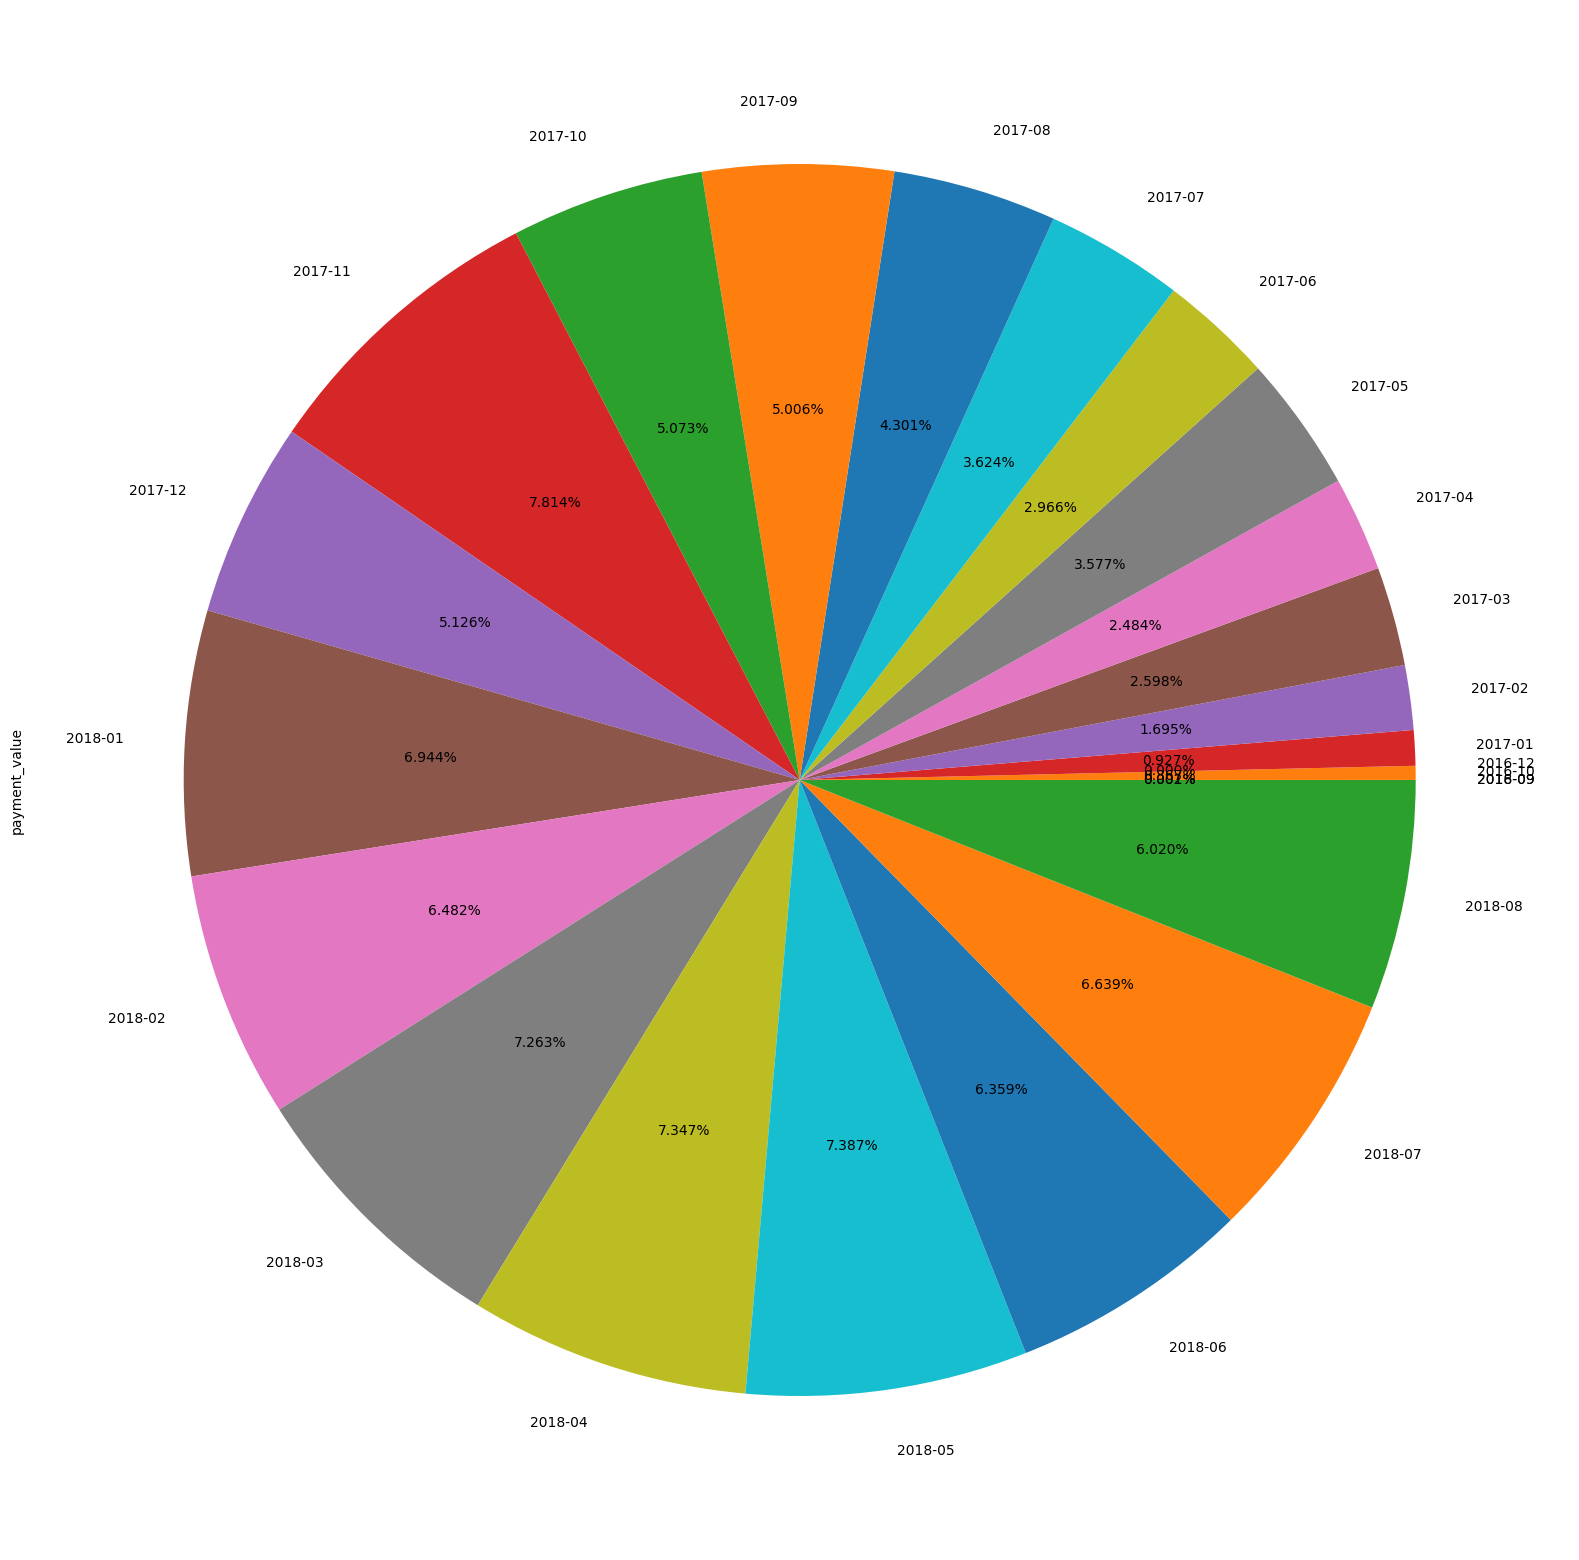

In [35]:
x = df.groupby("order_month").payment_value.sum()
print(x)
x.plot(kind="pie",autopct='%1.3f%%',figsize=(20,20))

Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

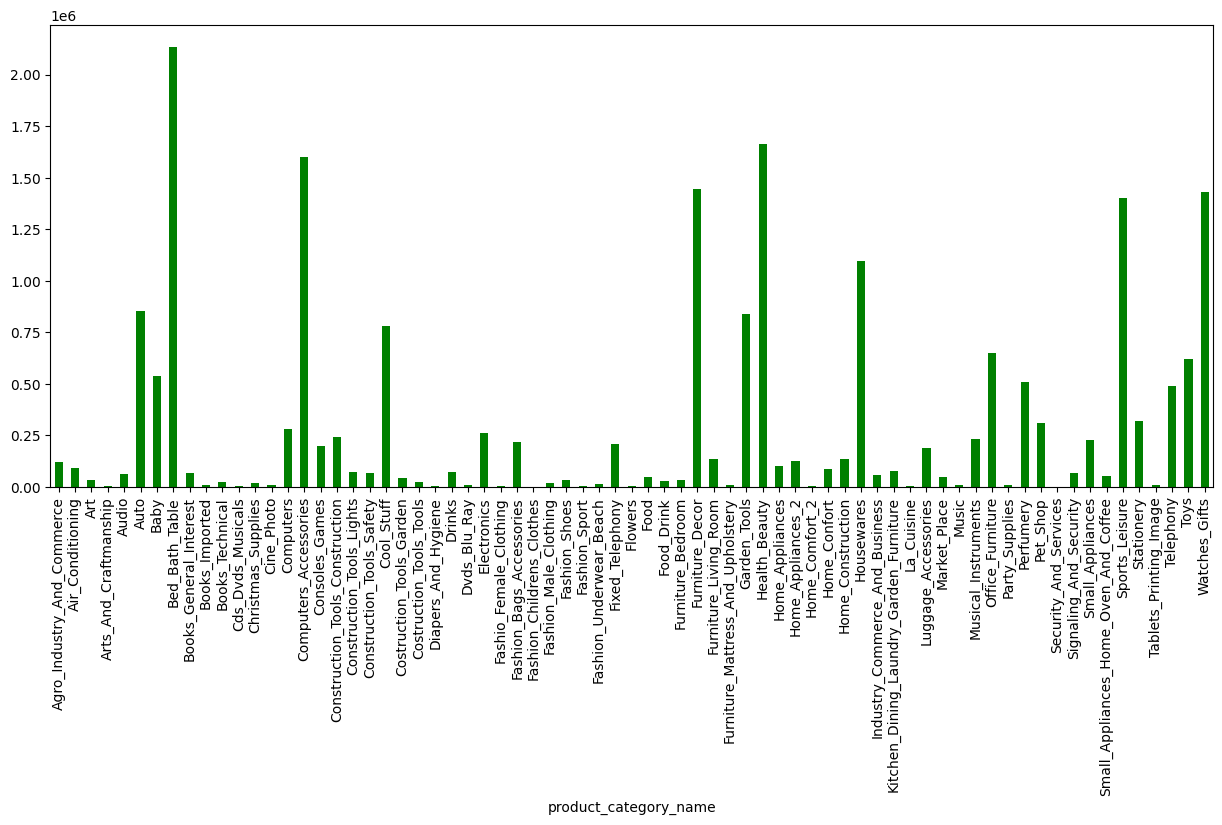

In [37]:
# Sales by Category
data_1 = df.groupby("product_category_name").payment_value.sum()
plt.figure(figsize=(15,6))
data_1.plot(kind="bar",color='green')
plt.show()

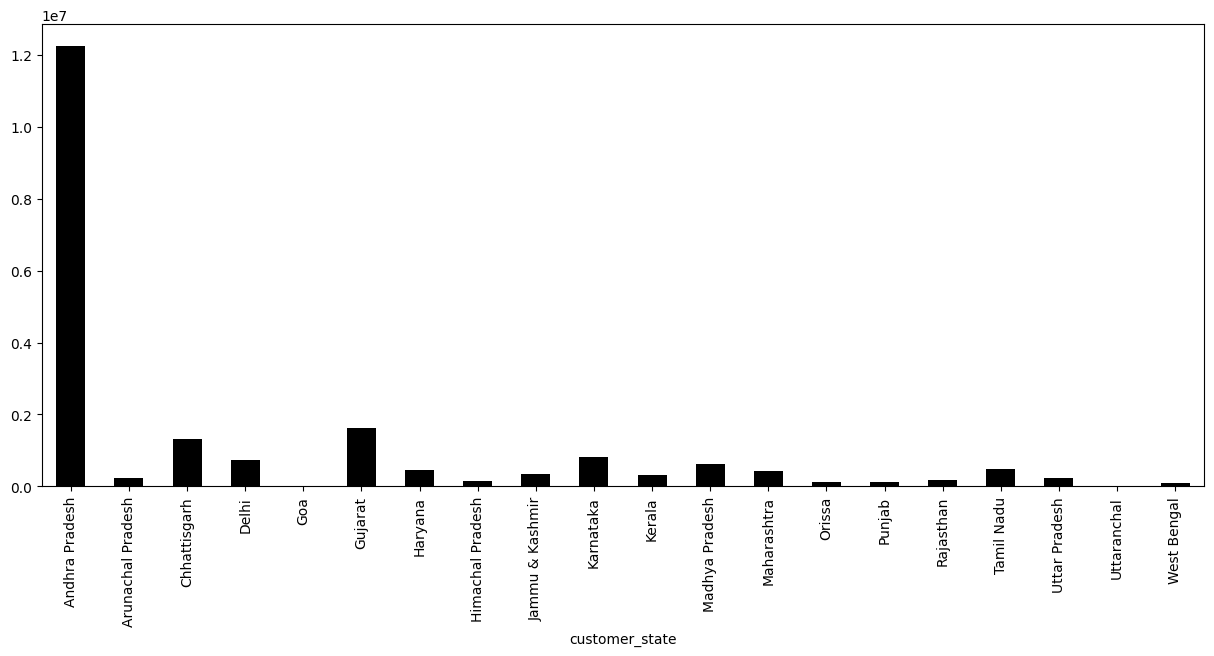

In [38]:
# Sales by location
data_1 = df.groupby("customer_state").payment_value.sum()
plt.figure(figsize=(15,6))
data_1.plot(kind="bar",color='black')
plt.show()

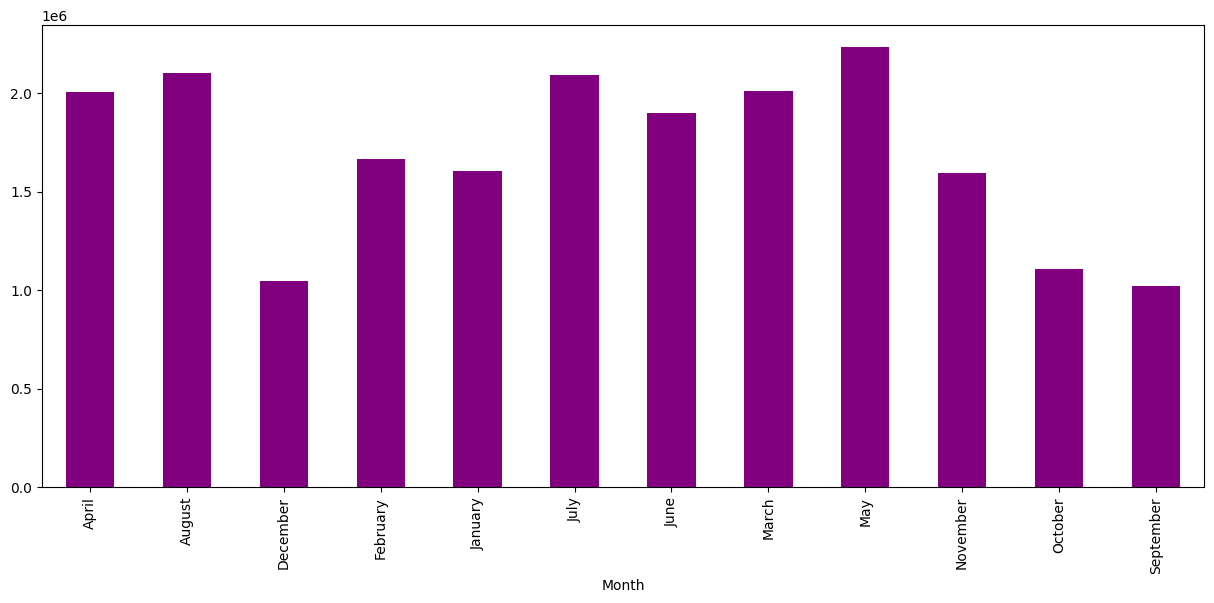

In [39]:
#Sales by Month
df_1 = df.copy()
df_1["Month"] = df["order_purchase_timestamp"].dt.month_name()
data_2 = df_1.groupby("Month").payment_value.sum()
plt.figure(figsize=(15,6))
data_2.plot(kind="bar",color='purple')
plt.show()

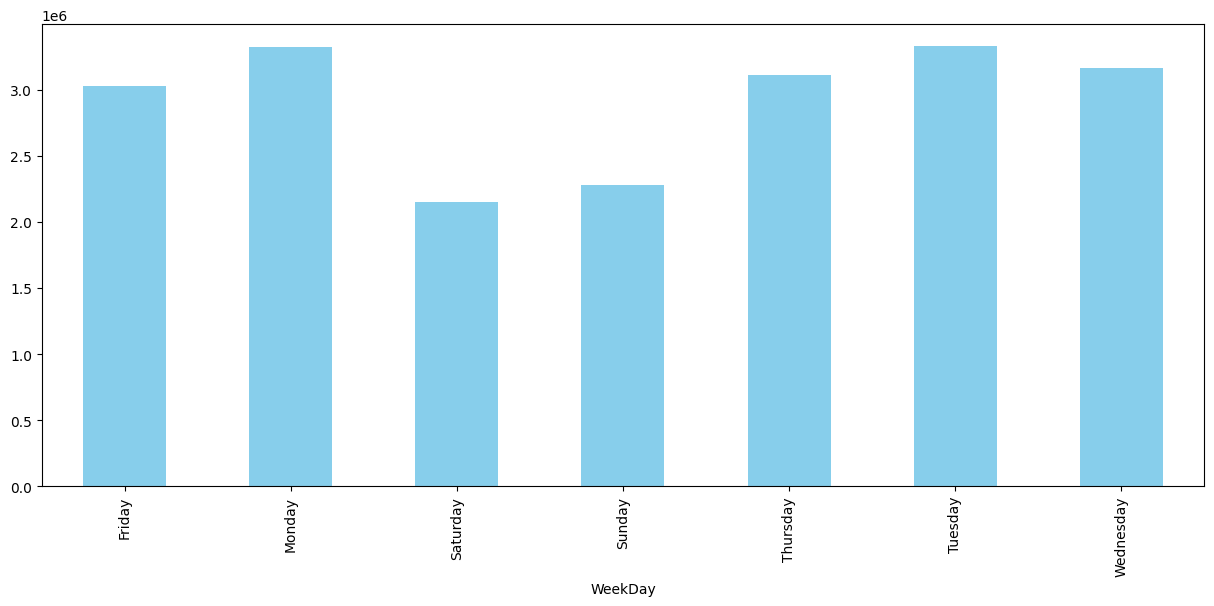

In [40]:
#Sales by Day
df_1["WeekDay"] = df["order_purchase_timestamp"].dt.day_name()
data_2 = df_1.groupby("WeekDay").payment_value.sum()
plt.figure(figsize=(15,6))
data_2.plot(kind="bar",color='skyblue')
plt.show()

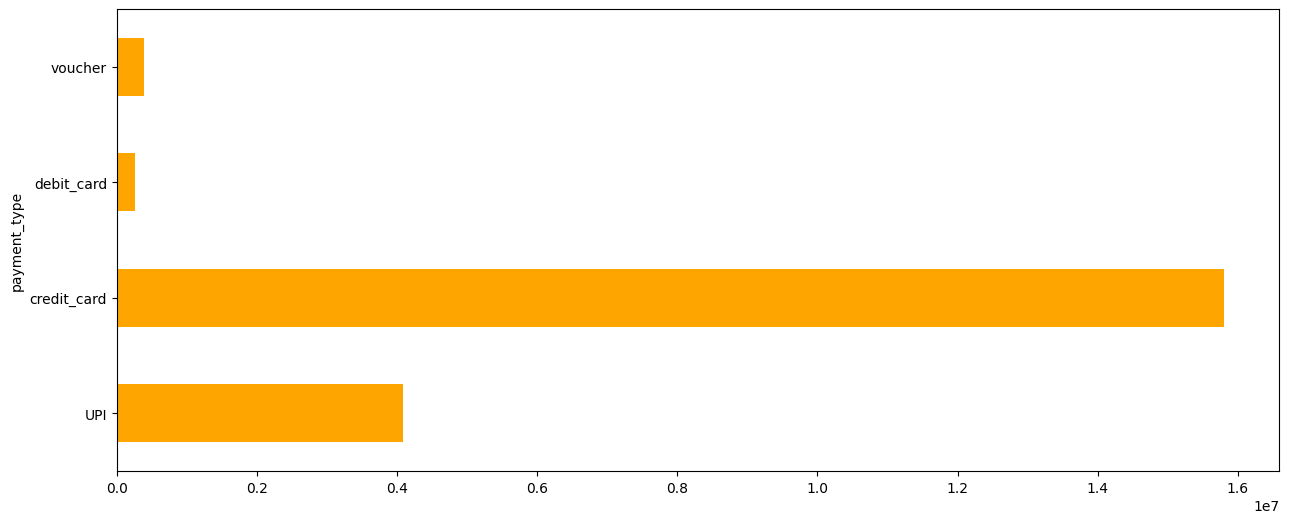

In [41]:
data_3 = df.groupby("payment_type").payment_value.sum()
plt.figure(figsize=(15,6))
data_3.plot(kind="barh",color='orange')
plt.show()

Popular Products by month, seller, state, category.

                                            order_count
Month     product_id                                   
September 422879e10f46682990de24d770e7f83d           38
October   422879e10f46682990de24d770e7f83d           42
November  422879e10f46682990de24d770e7f83d           96
May       53b36df67ebb7c41585e8d54d6772e08          115
March     aca2eb7d00ea1a7b8ebd4e68314663af           65
June      99a4788cb24856965c36a24e339b6058           76
July      99a4788cb24856965c36a24e339b6058           71
January   aca2eb7d00ea1a7b8ebd4e68314663af          124
February  3dd2a17168ec895c781a9191c1e95ad7           72
December  422879e10f46682990de24d770e7f83d           55
August    e7cc48a9daff5436f63d3aad9426f28b           70
April     53b36df67ebb7c41585e8d54d6772e08           86


C:\Users\dell\AppData\Local\Temp\ipykernel_20244\2925465543.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dx.rename(columns={"order_id":"order_count"},inplace=True)


<Axes: xlabel='Month,product_id'>

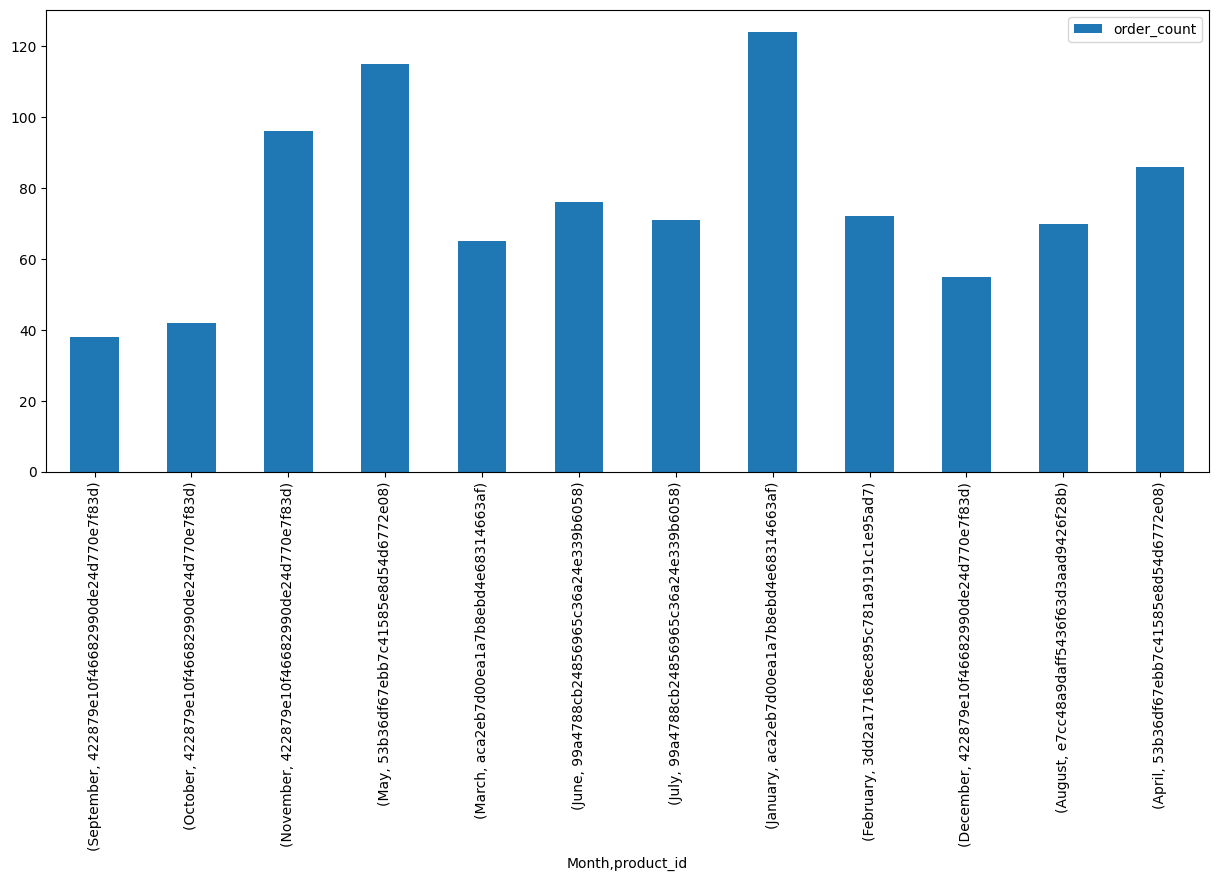

In [43]:
# Popular Product by Month
sorted_data = df_1[['Month','product_id', 'order_id']].groupby(["Month","product_id"]).agg("count")
sorted_data = sorted_data.sort_values(["Month","order_id"],ascending=False)
dx = sorted_data.groupby("Month").head(1)
dx.rename(columns={"order_id":"order_count"},inplace=True)
print(dx)
dx.plot(kind="bar",figsize=(15,6))

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\2358651553.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={"order_id":"order_count"},inplace=True)


                                                         order_count
seller_city            product_id                                   
Akkarampalle           aca2eb7d00ea1a7b8ebd4e68314663af         1310
Tarsali                99a4788cb24856965c36a24e339b6058          525
Kallur                 422879e10f46682990de24d770e7f83d          505
Dalurband              d1c427060a0f73f6b889a5c7c61f2ac4          355
Bheemavaram            154e7e31ebfa092203795c972e5804a6          295
Moragudi               3dd2a17168ec895c781a9191c1e95ad7          278
Badepalle              a62e25e09e05e6faf31d90c6ec1aa3d1          228
Chirala                53b36df67ebb7c41585e8d54d6772e08          217
Adoni                  bb50f2e236e5eea0100680137654686c          210
Bestavaripeta          5a848e4ab52fd5445cdc07aab1c40e48          197
Gaddi annaram          42a2c92a0979a949ca4ea89ec5c7b934          183
Siddipet               e53e557d5a159f5aa2c5e995dfdf244b          180
Anakapalle             6cdd5384349

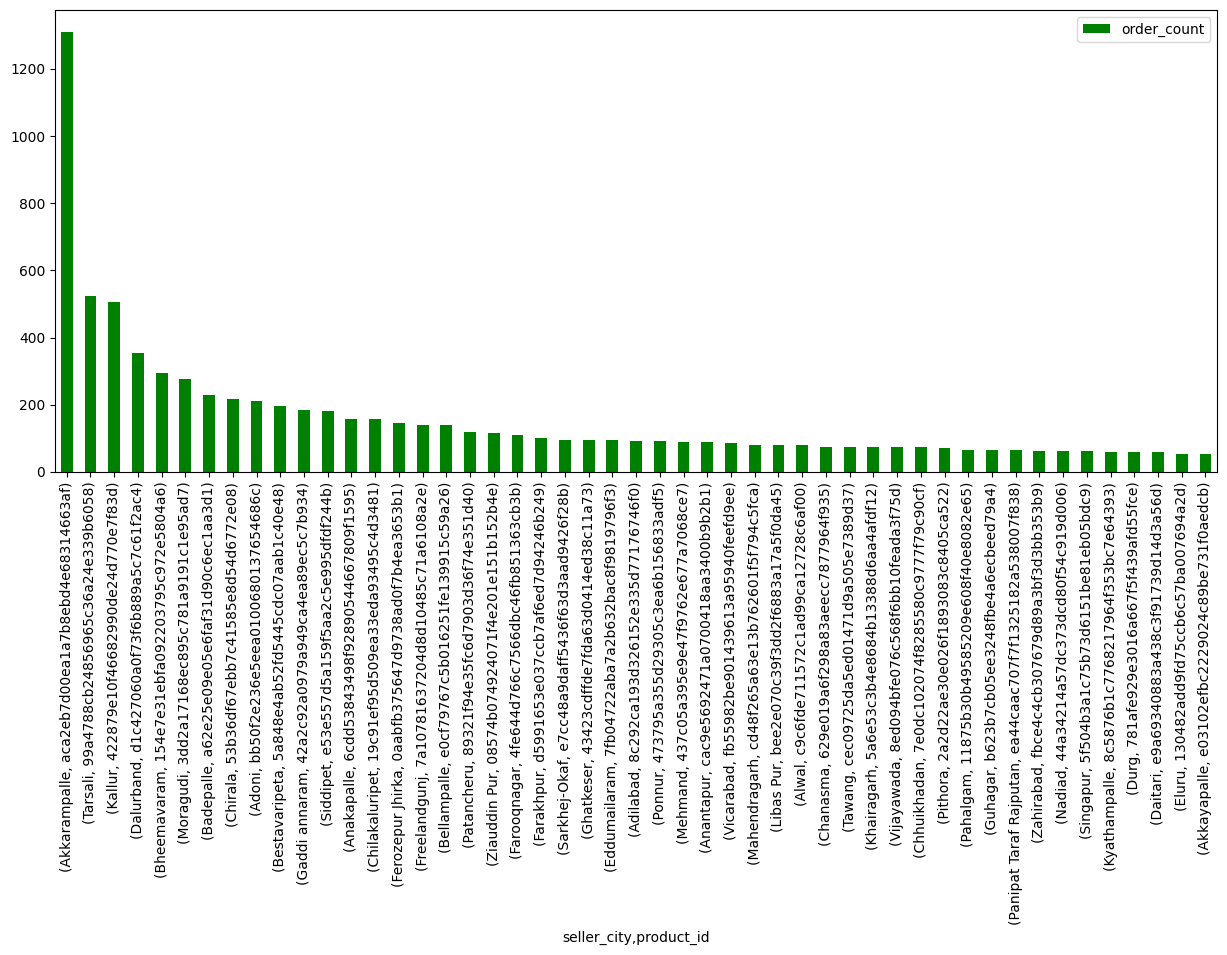

In [44]:
#Popular top 50 Product by seller city
seller_data = df[["seller_city","product_id","order_id"]].groupby(["seller_city","product_id"]).count()
seller_data = seller_data.sort_values(["seller_city","order_id"],ascending=False)
new = seller_data.groupby("seller_city").head(1)
new.rename(columns={"order_id":"order_count"},inplace=True)
new = new.sort_values("order_count",ascending=False)
print(new[new["order_count"]>50])
new[new["order_count"]>50].plot(kind="bar",figsize=(15,6),color="green")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\1541180093.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={"order_id":"order_count"},inplace=True)


                                                    order_count
customer_state    product_id                                   
Andhra Pradesh    aca2eb7d00ea1a7b8ebd4e68314663af          814
Gujarat           aca2eb7d00ea1a7b8ebd4e68314663af          106
Chhattisgarh      aca2eb7d00ea1a7b8ebd4e68314663af           82
Karnataka         aca2eb7d00ea1a7b8ebd4e68314663af           45
Haryana           aca2eb7d00ea1a7b8ebd4e68314663af           41
Delhi             aca2eb7d00ea1a7b8ebd4e68314663af           40
Madhya Pradesh    aca2eb7d00ea1a7b8ebd4e68314663af           39
Kerala            aca2eb7d00ea1a7b8ebd4e68314663af           27
Tamil Nadu        aca2eb7d00ea1a7b8ebd4e68314663af           23
Maharashtra       aca2eb7d00ea1a7b8ebd4e68314663af           20
Jammu & Kashmir   aca2eb7d00ea1a7b8ebd4e68314663af           16
Arunachal Pradesh aca2eb7d00ea1a7b8ebd4e68314663af           14
Punjab            60ee9861f35c13d4a3a2bc10e86bb05b           10
Orissa            aca2eb7d00ea1a7b8ebd4e

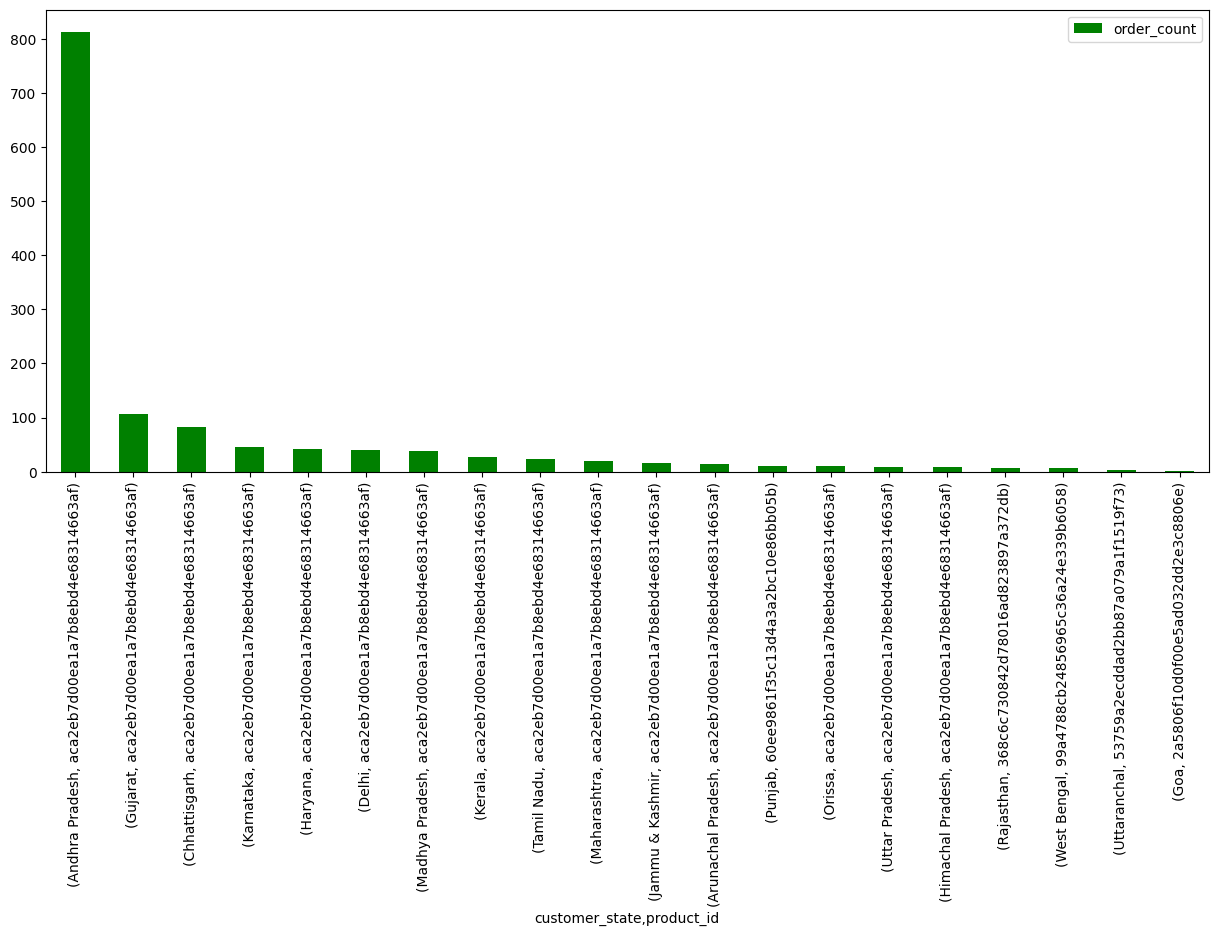

In [45]:
#Popular Product by State
state_data = df[["customer_state","product_id","order_id"]].groupby(["customer_state","product_id"]).count()
state_data = state_data.sort_values(["customer_state","order_id"],ascending=False)
new = state_data.groupby("customer_state").head(1)
new.rename(columns={"order_id":"order_count"},inplace=True)
new = new.sort_values("order_count",ascending=False)
print(new)
new.plot(kind="bar",figsize=(15,6),color="green")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\561657547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={"order_id":"order_count"},inplace=True)


                                                            order_count
product_category_name     product_id                                   
Bed_Bath_Table            aca2eb7d00ea1a7b8ebd4e68314663af          776
Furniture_Decor           aca2eb7d00ea1a7b8ebd4e68314663af          534
Garden_Tools              422879e10f46682990de24d770e7f83d          505
Computers_Accessories     d1c427060a0f73f6b889a5c7c61f2ac4          355
Watches_Gifts             53b36df67ebb7c41585e8d54d6772e08          327
...                                                                 ...
Fashion_Sport             e8f7d2639ff8caa8b86e5973295898b7            5
Music                     2848023ffcfb063bb7aa0d0c447bd116            4
Fashion_Childrens_Clothes 57bdf3098169cccdb62221bd3e089cbd            3
La_Cuisine                33900d427fa4bd3f509cdacda72e84a3            3
Security_And_Services     6c7a0a349ad11817745e3ad58abd5c79            1

[71 rows x 1 columns]


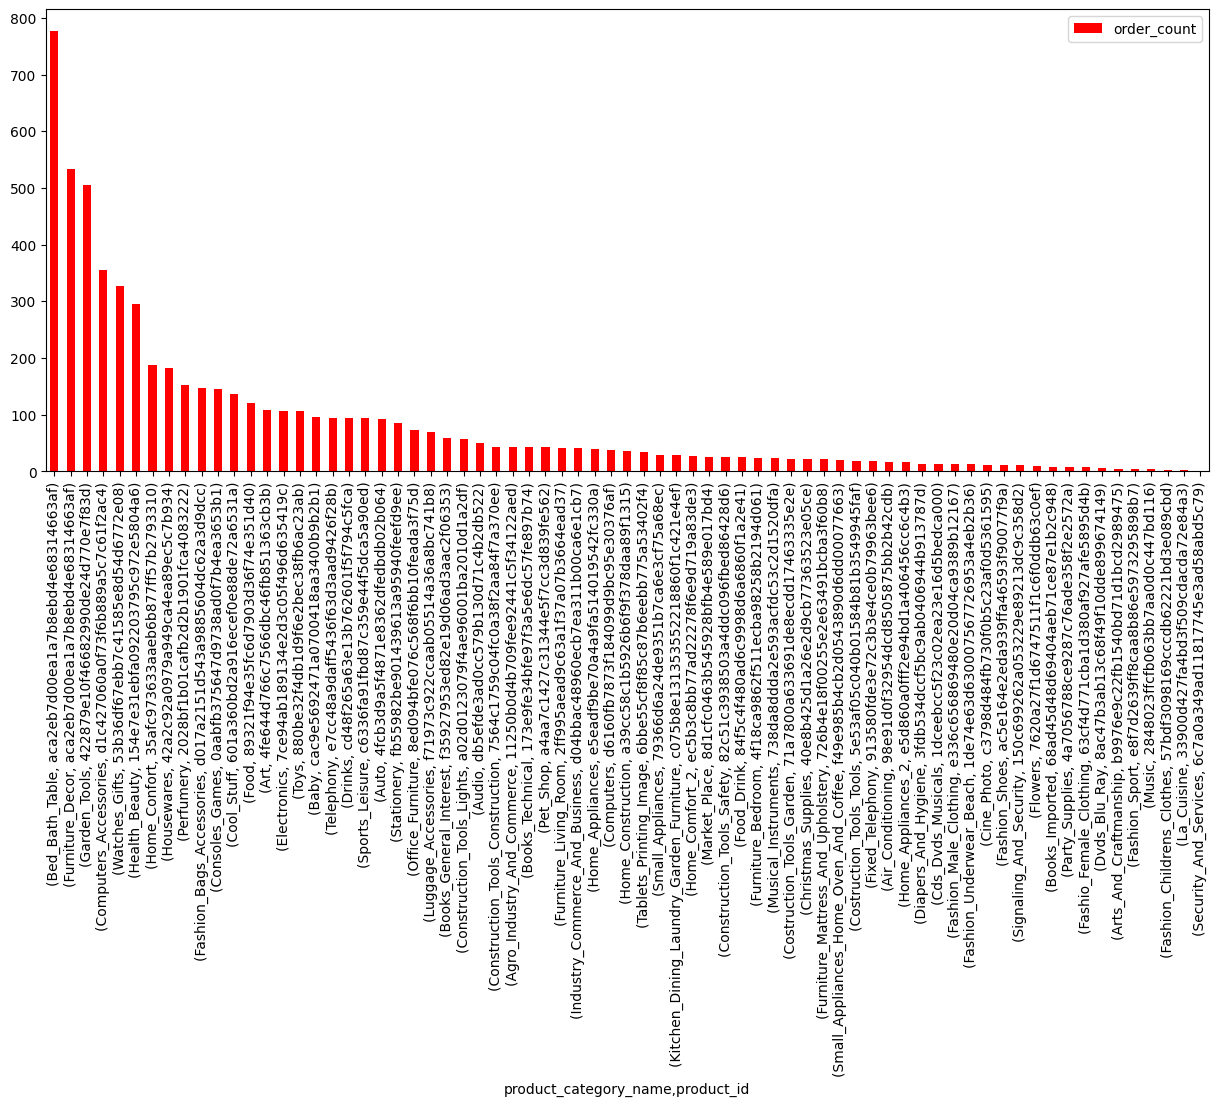

In [46]:
#Popular Product by Category
category_data = df[["product_category_name","product_id","order_id"]].groupby(["product_category_name","product_id"]).count()
category_data = category_data.sort_values(["product_category_name","order_id"],ascending=False)
new = category_data.groupby("product_category_name").head(1)
new.rename(columns={"order_id":"order_count"},inplace=True)
new = new.sort_values("order_count",ascending=False)
print(new)
new.plot(kind="bar",figsize=(15,6),color="red")
plt.show()

### g. Popular categories by state, month

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\2387813733.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={"order_id":"order_count"},inplace=True)


                                         order_count
customer_state    product_category_name             
Andhra Pradesh    Bed_Bath_Table                9262
Gujarat           Bed_Bath_Table                 973
Chhattisgarh      Bed_Bath_Table                 863
Karnataka         Bed_Bath_Table                 490
Madhya Pradesh    Bed_Bath_Table                 410
Delhi             Bed_Bath_Table                 386
Haryana           Bed_Bath_Table                 360
Tamil Nadu        Bed_Bath_Table                 274
Maharashtra       Bed_Bath_Table                 264
Jammu & Kashmir   Bed_Bath_Table                 214
Kerala            Bed_Bath_Table                 189
Arunachal Pradesh Bed_Bath_Table                 159
Uttar Pradesh     Bed_Bath_Table                 120
Himachal Pradesh  Bed_Bath_Table                 104
Rajasthan         Sports_Leisure                  97
Orissa            Bed_Bath_Table                  95
Punjab            Health_Beauty               

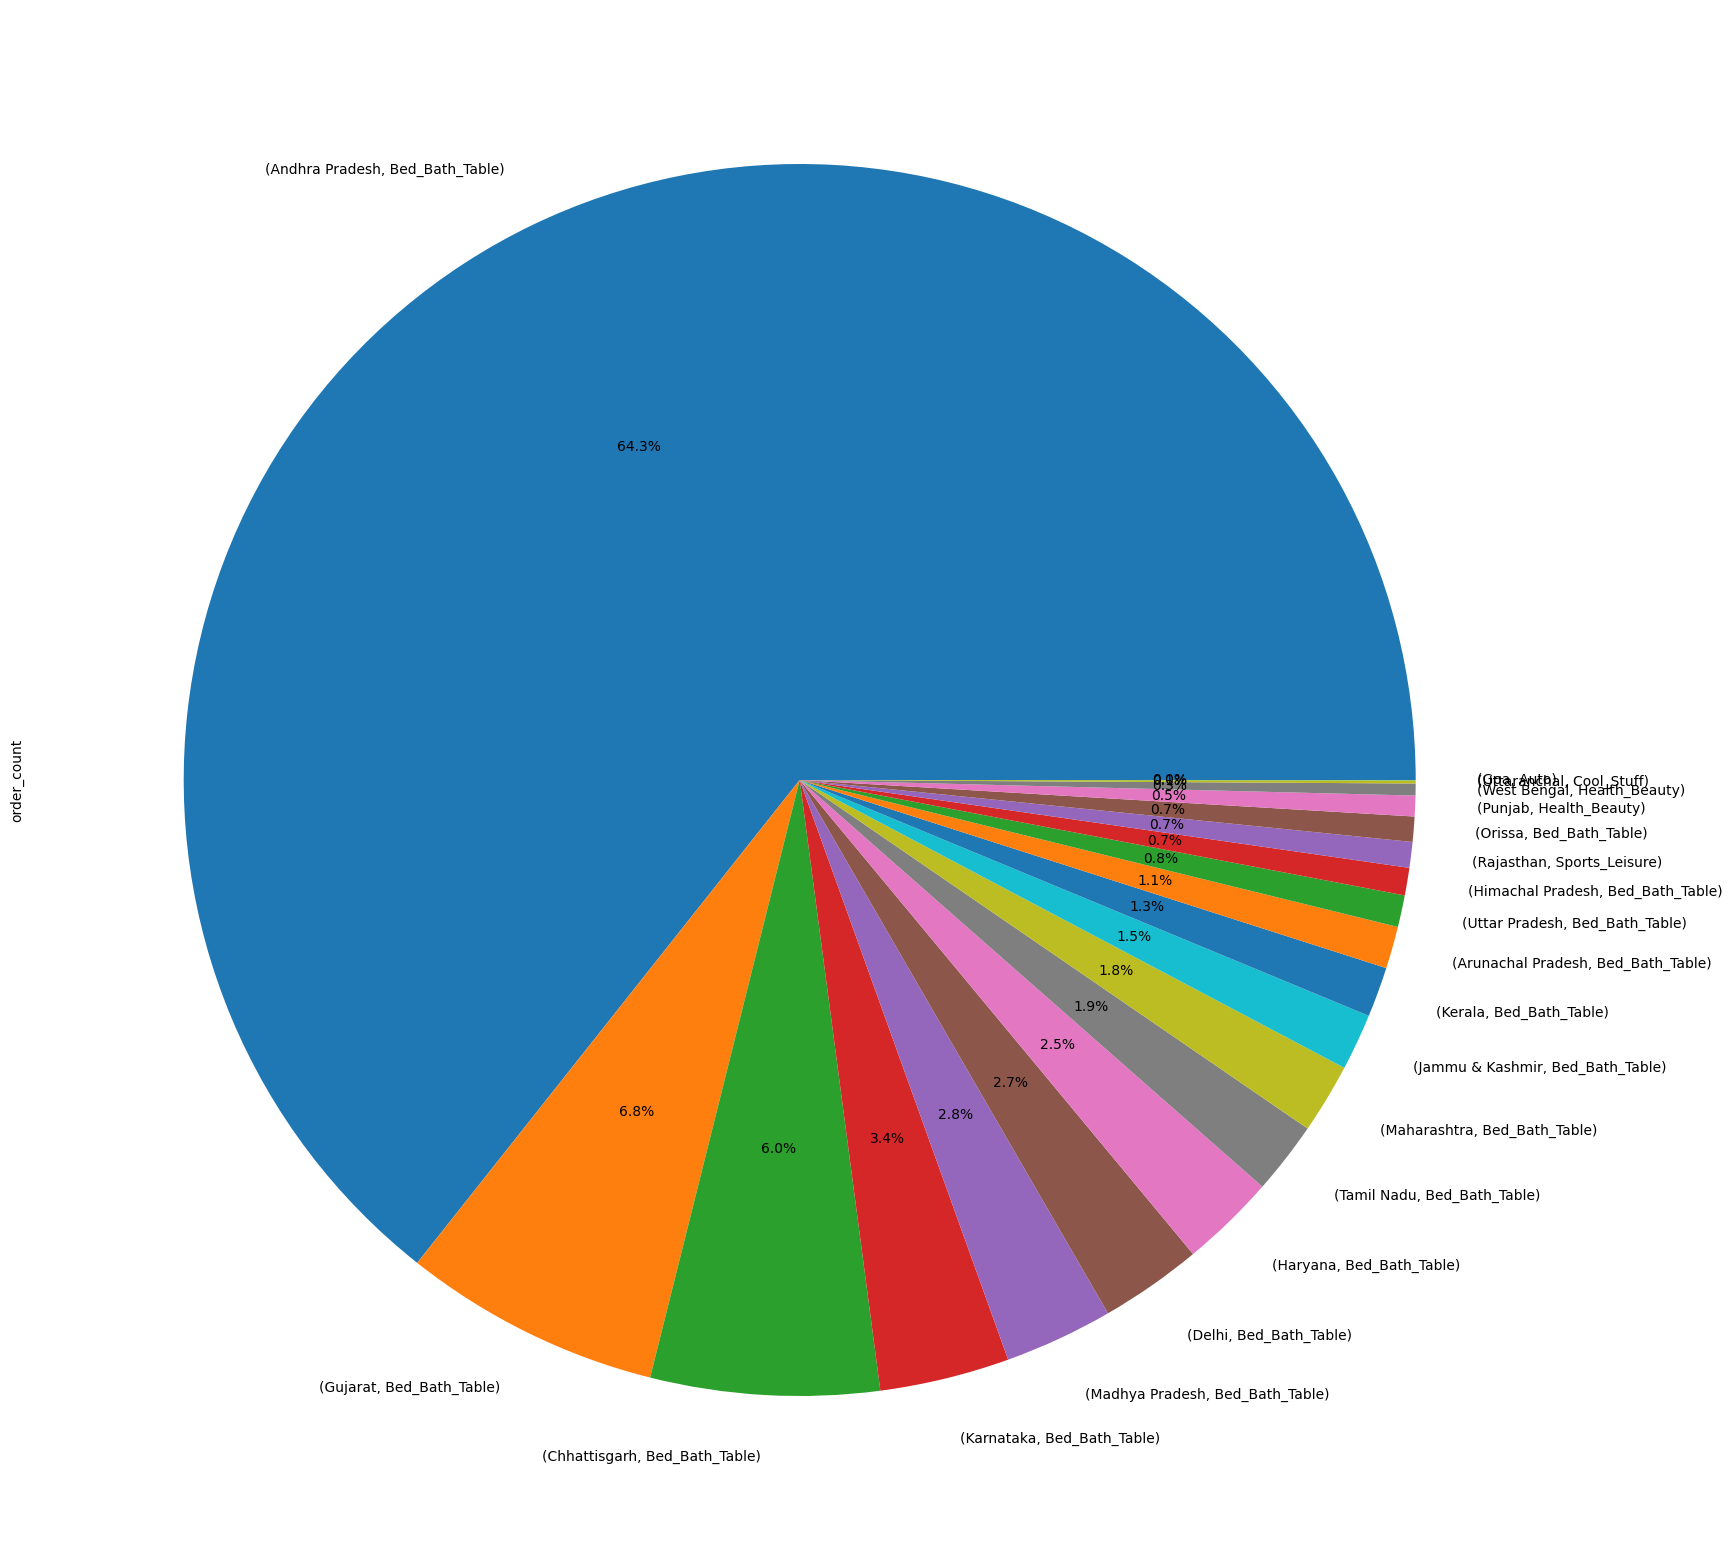

In [48]:
category_data = df[["customer_state","product_category_name","order_id"]].groupby(["customer_state","product_category_name"]).count()
category_data = category_data.sort_values(["customer_state","order_id"],ascending=False)
new = category_data.groupby("customer_state").head(1)
new.rename(columns={"order_id":"order_count"},inplace=True)
new = new.sort_values("order_count",ascending=False)
print(new)
new["order_count"].plot(kind="pie",figsize=(20,20),autopct="%1.1f%%")
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\2316535276.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.rename(columns={"order_id":"order_count"},inplace=True)


                                 order_count
Month     product_category_name             
July      Bed_Bath_Table                1405
March     Bed_Bath_Table                1367
August    Bed_Bath_Table                1357
May       Bed_Bath_Table                1356
June      Bed_Bath_Table                1338
April     Bed_Bath_Table                1238
January   Bed_Bath_Table                1193
November  Bed_Bath_Table                1157
February  Computers_Accessories         1127
December  Bed_Bath_Table                 740
October   Bed_Bath_Table                 696
September Bed_Bath_Table                 647


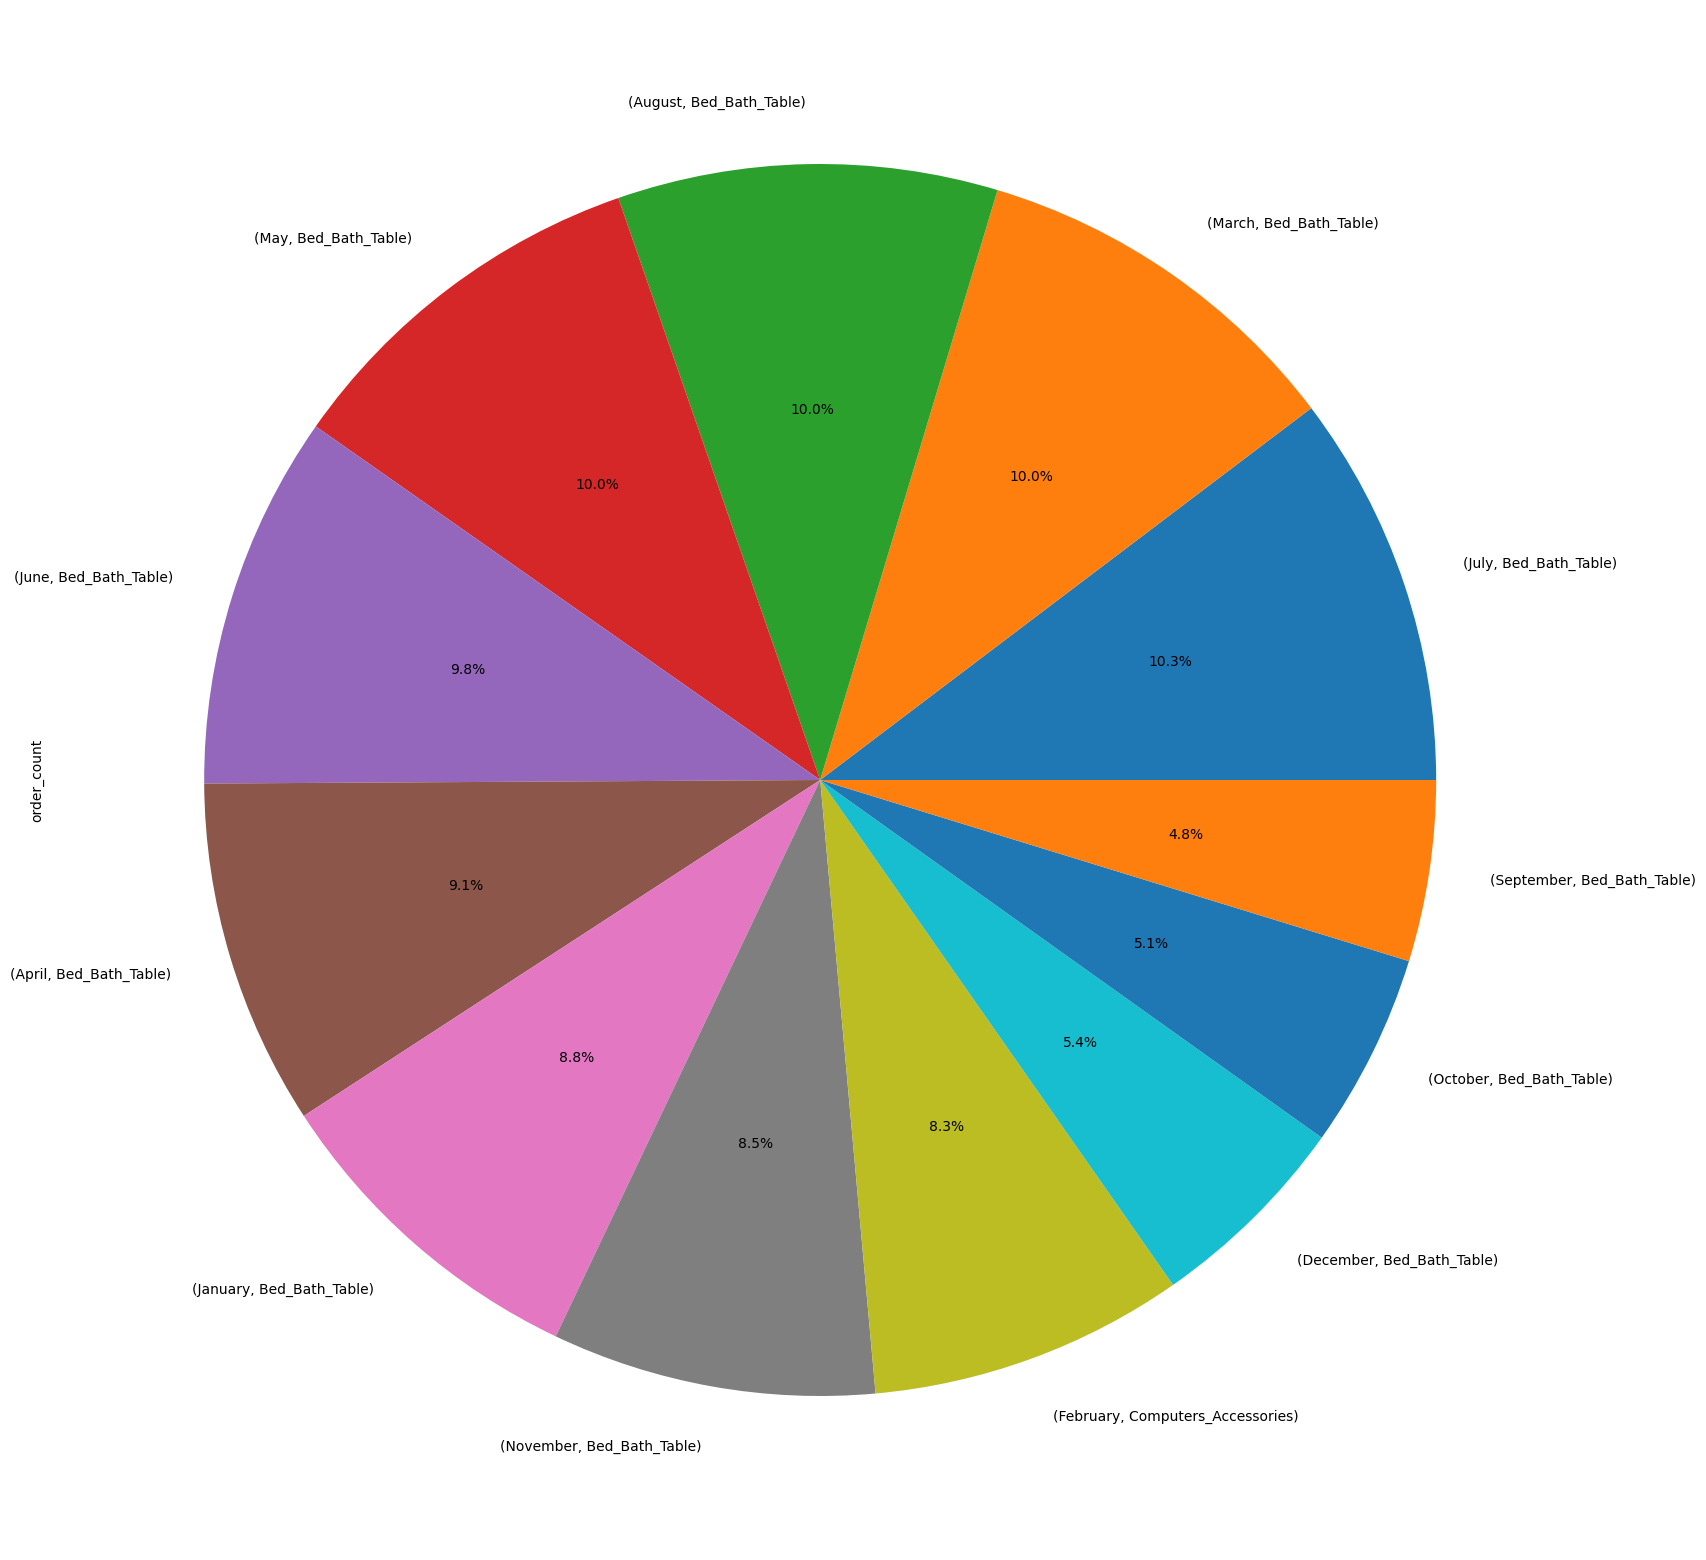

In [49]:
Month_data = df_1[["Month","product_category_name","order_id"]].groupby(["Month","product_category_name"]).count()
Month_data = Month_data.sort_values(["Month","order_id"],ascending=False)
new = Month_data.groupby("Month").head(1)
new.rename(columns={"order_id":"order_count"},inplace=True)
new = new.sort_values("order_count",ascending=False)
print(new)
new["order_count"].plot(kind="pie",figsize=(20,20),autopct="%1.1f%%")
plt.show()

h. List top 10 most expensive products sorted by price

                         product_id product_category_name    price
0  489ae2aa008f021502940f251d4cce7f            Housewares  6735.00
1  69c590f7ffc7bf8db97190b6cb6ed62e             Computers  6729.00
2  1bdf5e6731585cf01aa8169c7028d6ad                   Art  6499.00
3  a6492cc69376c469ab6f61d8f44de961      Small_Appliances  4799.00
4  c3ed642d592594bb648ff4a04cee2747      Small_Appliances  4690.00
5  259037a6a41845e455183f89c5035f18             Computers  4590.00
6  a1beef8f3992dbd4cd8726796aa69c53   Musical_Instruments  4399.87
7  6cdf8fc1d741c76586d8b6b15e9eef30        Consoles_Games  4099.99
8  dd113cb02b2af9c8e5787e8f1f0722f6        Sports_Leisure  4059.00
9  6902c1962dd19d540807d0ab8fade5c6         Watches_Gifts  3999.90


<Axes: >

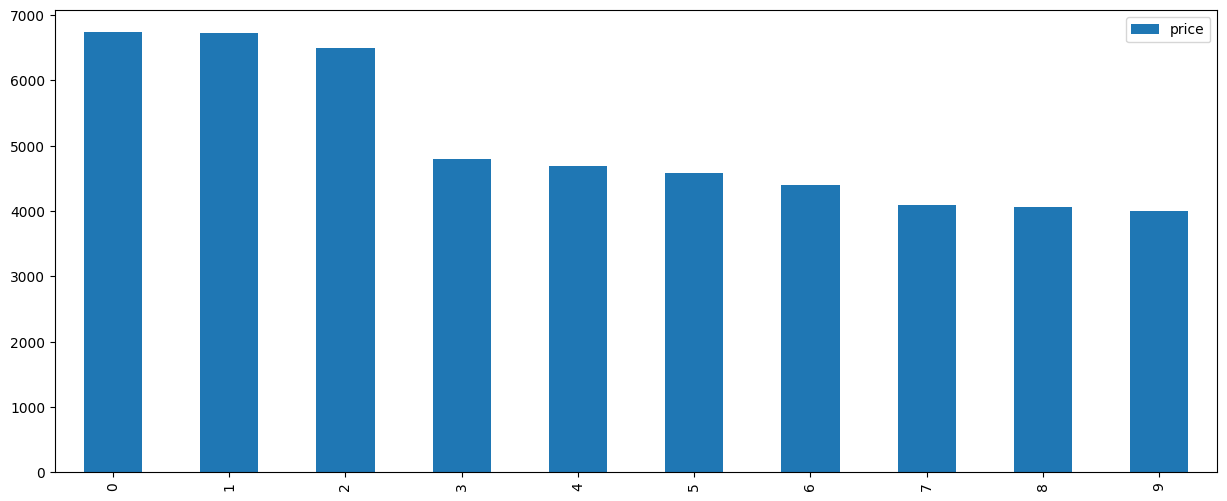

In [51]:
result = df[["product_id","product_category_name","price"]].sort_values("price",ascending=False).head(10).reset_index(drop=True)
print(result)
result.plot(kind="bar",figsize=(15,6))

### 2. Performing Customers/sellers Segmentation
      a. Divide the customers into groups based on the revenue generated
      b. Divide the sellers into groups based on the revenue generated

In [53]:
new_data=df_1.groupby(by='customer_unique_id')[['payment_value']].sum().reset_index()
new_data.rename(columns={'payment_value': 'total_revenue_per_customer'}, inplace=True)
df_1=pd.merge(left=df_1,right=new_data, on='customer_unique_id',how='left')
df_1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,seller_id,seller_city,seller_state,...,payment_value,order_status,order_purchase_timestamp,order_item_id,price,freight_value,order_month,Month,WeekDay,total_revenue_per_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,a9516a079e37a9c9c36b9b78b10169e8,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,...,146.87,delivered,2017-05-16,1.0,124.99,21.88,2017-05,May,Tuesday,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,4aa6014eceb682077f9dc4bffebc05b0,Housewares,b8bc237ba3788b23da09c0f1f3a3288c,Sadasivpet,Andhra Pradesh,...,335.48,delivered,2018-01-12,1.0,289.00,46.48,2018-01,January,Friday,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,bd07b66896d6f1494f5b86251848ced7,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,...,157.73,delivered,2018-05-19,1.0,139.94,17.79,2018-05,May,Saturday,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,a5647c44af977b148e0a3a4751a09e2e,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,...,173.30,delivered,2018-03-13,1.0,149.94,23.36,2018-03,March,Tuesday,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,9391a573abe00141c56e38d84d7d5b3b,Home_Confort,4a3ca9315b744ce9f8e9374361493884,Tarsali,Gujarat,...,252.25,delivered,2018-07-29,1.0,230.00,22.25,2018-07,July,Sunday,252.25


In [94]:
print(df_1.total_revenue_per_customer.min())
print(df_1.total_revenue_per_customer.max())
print(df_1.total_revenue_per_customer.mean())

6.18
109312.64
383.1753189638425


In [96]:
df_1['customer_segment']=df_1.total_revenue_per_customer.apply(lambda x: 'high budget' if x>1000  else 'mid budget' if  (x>=500 ) else 'low budget' if (x>=1) else 'zero spend' )
segment=df_1.customer_segment.value_counts().reset_index()
segment

,customer_segment,count
0,low budget,102084
1,mid budget,8992
2,high budget,7323


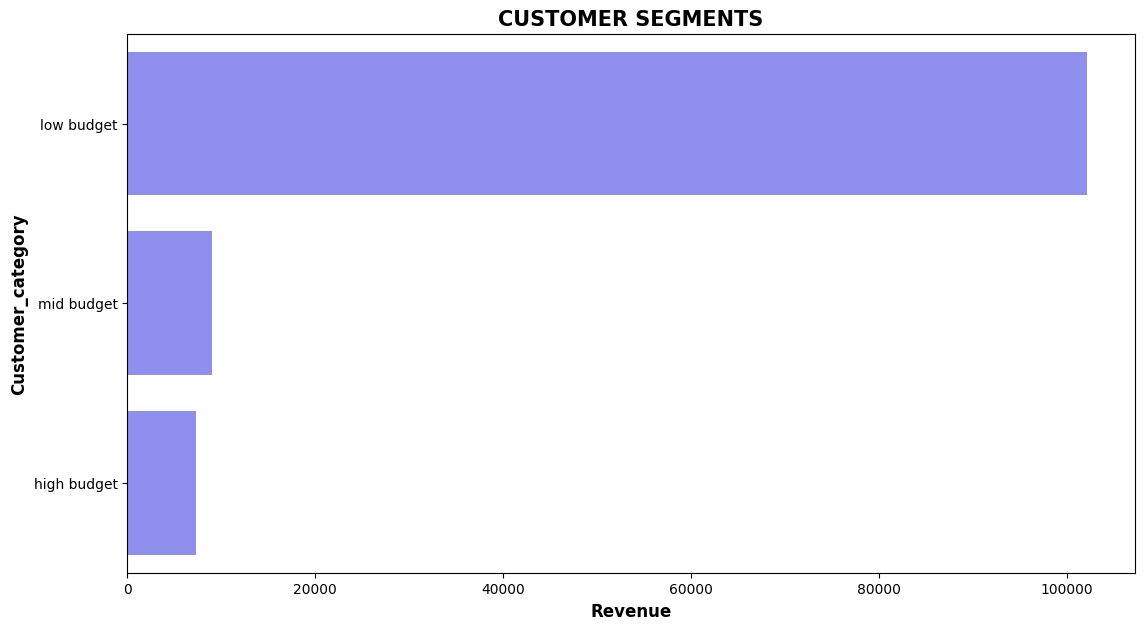

In [114]:
plt.figure(figsize=(13, 7))
fig=sns.barplot(data = segment, x= 'count', y='customer_segment', color='blue',alpha=0.5)
plt.title('CUSTOMER SEGMENTS', fontsize=15, fontweight='bold')
plt.xlabel("Revenue" , fontsize=12, fontweight='bold')
plt.ylabel("Customer_category" , fontsize=12, fontweight='bold')
plt.show()

In [116]:
new_data_re=df_1.groupby(by='seller_id')[['payment_value']].sum().reset_index()
new_data_re.rename(columns={'payment_value': 'total_revenue_per_seller'}, inplace=True)
df_1=pd.merge(left=df_1,right=new_data_re, on='seller_id',how='left')
df_1.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,seller_id,seller_city,seller_state,...,order_purchase_timestamp,order_item_id,price,freight_value,order_month,Month,WeekDay,total_revenue_per_customer,customer_segment,total_revenue_per_seller
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,a9516a079e37a9c9c36b9b78b10169e8,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,...,2017-05-16,1.0,124.99,21.88,2017-05,May,Tuesday,146.87,low budget,510772.79
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,4aa6014eceb682077f9dc4bffebc05b0,Housewares,b8bc237ba3788b23da09c0f1f3a3288c,Sadasivpet,Andhra Pradesh,...,2018-01-12,1.0,289.00,46.48,2018-01,January,Friday,335.48,low budget,17634.04
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh,bd07b66896d6f1494f5b86251848ced7,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,...,2018-05-19,1.0,139.94,17.79,2018-05,May,Saturday,157.73,low budget,510772.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh,a5647c44af977b148e0a3a4751a09e2e,Office_Furniture,7c67e1448b00f6e969d365cea6b010ab,Vijayawada,Andhra Pradesh,...,2018-03-13,1.0,149.94,23.36,2018-03,March,Tuesday,173.30,low budget,510772.79
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh,9391a573abe00141c56e38d84d7d5b3b,Home_Confort,4a3ca9315b744ce9f8e9374361493884,Tarsali,Gujarat,...,2018-07-29,1.0,230.00,22.25,2018-07,July,Sunday,252.25,low budget,440438.29


In [118]:
print(df_1.total_revenue_per_seller.min())
print(df_1.total_revenue_per_seller.max())
print(df_1.total_revenue_per_seller.mean())

12.22
510772.79
71116.83548932


In [122]:
df_1['seller_segment']=df_1.total_revenue_per_seller.apply(lambda x: 'high budget' if x>150000  else 'mid budget' if  (x>=65000 ) else 'low budget' if (x>=1) else 'zero spend' )
segment_re=df_1.seller_segment.value_counts().reset_index()
segment_re

,seller_segment,count
0,low budget,85873
1,high budget,18019
2,mid budget,14507


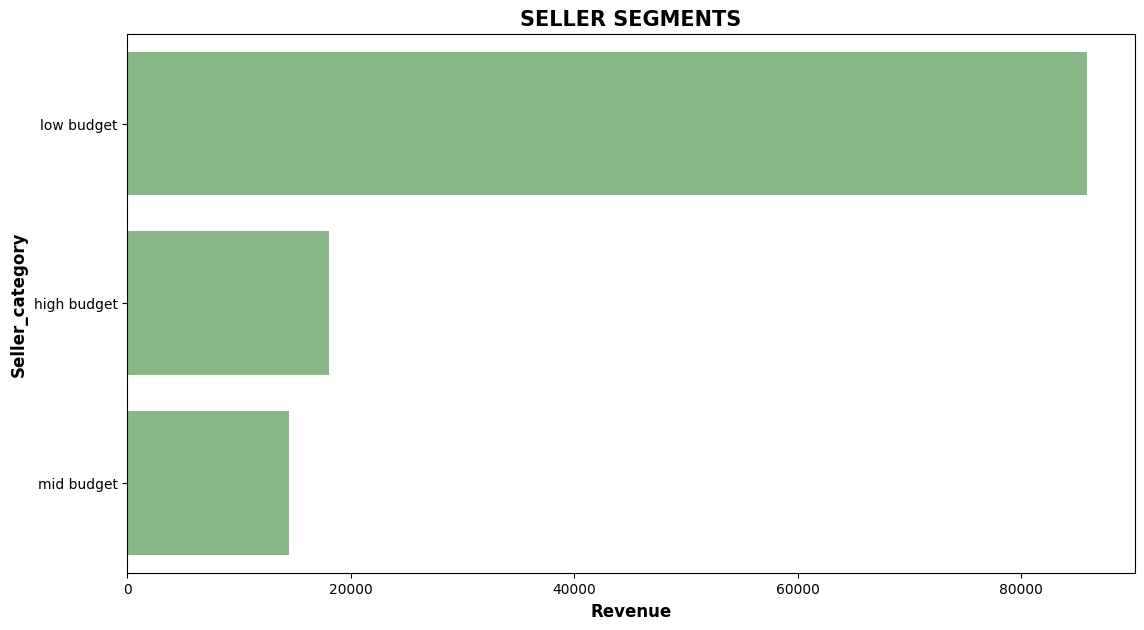

In [128]:
plt.figure(figsize=(13, 7))
fig=sns.barplot(data = segment_re, x= 'count', y='seller_segment', color='green',alpha=0.5)
plt.title('SELLER SEGMENTS', fontsize=15, fontweight='bold')
plt.xlabel("Revenue" , fontsize=12, fontweight='bold')
plt.ylabel("Seller_category" , fontsize=12, fontweight='bold')
plt.show()

### 3. Cross-Selling (Which products are selling together)
Hint: We need to find which of the top 10 combinations of products are selling together in
each transaction. (combination of 2 or 3 buying together)

In [215]:
cross_selling = df_1[df_1.duplicated(['order_purchase_timestamp','customer_id'], keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],keep =False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04,c1488892604e4ba5cff5b4eb4d595400
2,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04,48a12f318432c4b6a1fdfd5d79372e66
3,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04,d48e56be99464cbf285a9da17f618165
4,3f6f000d5b0a959f38481fad4ab7cac2,2016-10-04,66e08854f9319c6aa4874ca435598331
...,...,...,...
3316,e5a8aaccb766e00177b0a587979cc814,2018-08-26,df4bcf4a328103951507064660c445e9
3317,e5a8aaccb766e00177b0a587979cc814,2018-08-26,3af5874bd2429ed183a5445d1432fcde
3318,02ae654741ad895368bd9ffc371893e5,2018-08-26,a1b35ee994b8c571119976c30aa07efe
3319,c24bbeb8111fea27eab791a37e665210,2018-08-27,8cf22b2cc9465d64474a09853b62f5b2


### 4. Payment Behaviour
a. How customers are paying?
b. Which payment channels are used by most customers?

In [232]:
### a. How customers are paying?
pay = df_1.groupby(["payment_type"])[["payment_value"]].sum()
pay

,payment_value
payment_type,
UPI,4083687.96
credit_card,15800899.66
debit_card,254490.83
voucher,390749.58


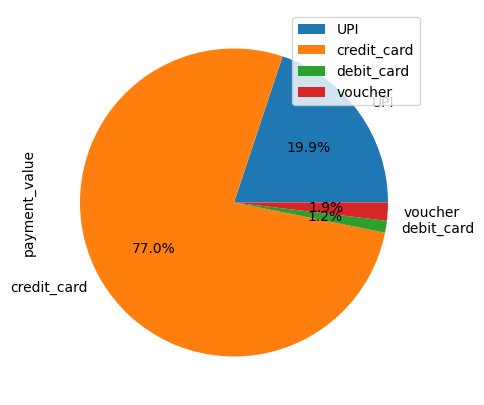

In [238]:
pay.plot(kind="pie",subplots=True,autopct="%1.1f%%",figsize=(5,5))
plt.show()

In [ ]:
# b. Which payment channels are used by most customers?

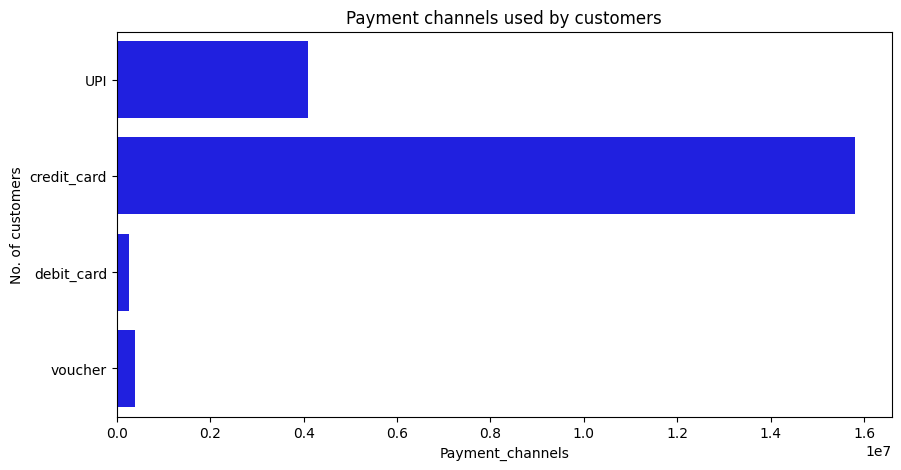

In [251]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=pay, x= 'payment_value', y='payment_type', color='blue')
plt.xlabel("Payment_channels")
plt.ylabel("No. of customers")
plt.title('Payment channels used by customers')
plt.show()

### 5. Customer satisfaction towards category & product
a. Which categories (top 10) are maximum rated & minimum rated?
b. Which products (top10) are maximum rated & minimum rated?
c. Average rating by location, seller, product, category, month etc.

In [263]:
#a. Which categories (top 10) are maximum rated & minimum rated?
max_rate_cat = df.groupby("product_category_name")[["review_score"]].mean().nlargest(10,"review_score")
min_rate_cat = df.groupby("product_category_name")[["review_score"]].mean().nsmallest(10,"review_score")
max_rate_cat

,review_score
product_category_name,
Cds_Dvds_Musicals,4.642857
Fashion_Childrens_Clothes,4.500000
Books_General_Interest,4.431858
Books_Imported,4.419355
Books_Technical,4.345588
Costruction_Tools_Tools,4.333333
Small_Appliances_Home_Oven_And_Coffee,4.320513
Food_Drink,4.307958
Luggage_Accessories,4.290799


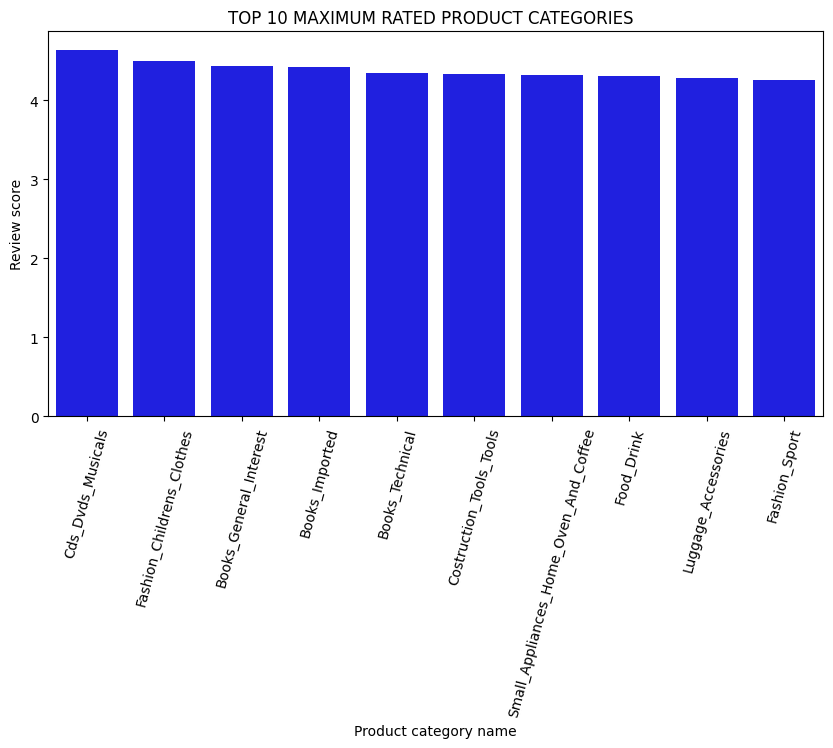

In [277]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=max_rate_cat, x= 'product_category_name', y='review_score', color='blue')
plt.xlabel("Product category name")
plt.ylabel("Review score")
plt.xticks(rotation=75)
plt.title('TOP 10 MAXIMUM RATED PRODUCT CATEGORIES  ')
plt.show()

In [267]:
min_rate_cat

,review_score
product_category_name,
Security_And_Services,2.500000
Diapers_And_Hygiene,3.256410
Home_Comfort_2,3.387097
Office_Furniture,3.508742
Fashion_Male_Clothing,3.528169
Fixed_Telephony,3.661765
Fashio_Female_Clothing,3.780000
Party_Supplies,3.795455
Furniture_Mattress_And_Upholstery,3.804878


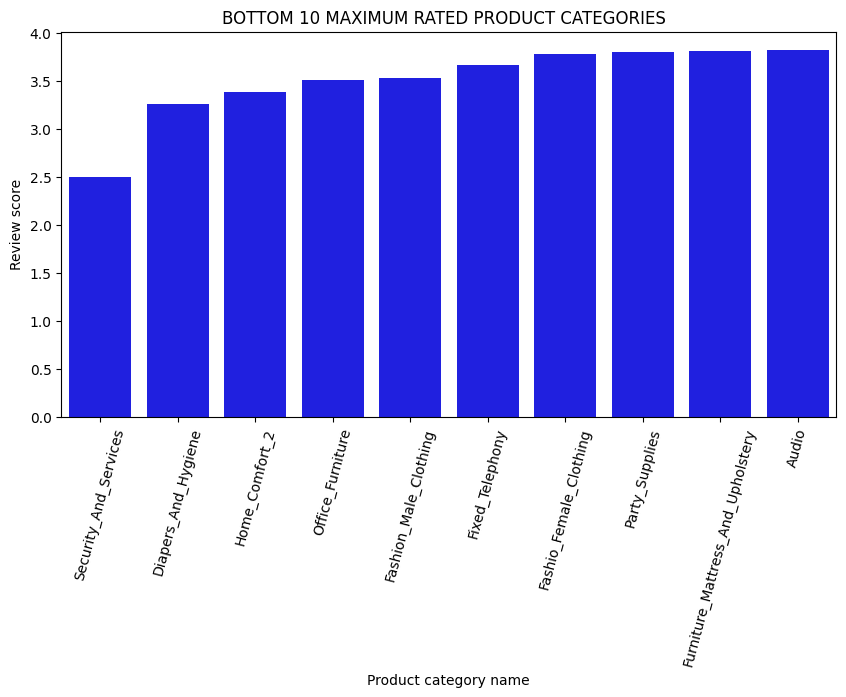

In [281]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=min_rate_cat, x= 'product_category_name', y='review_score', color='blue')
plt.xlabel("Product category name")
plt.ylabel("Review score")
plt.xticks(rotation=75)
plt.title('BOTTOM 10 MAXIMUM RATED PRODUCT CATEGORIES  ')
plt.show()

In [271]:
# b. Which products (top10) are maximum rated & minimum rated?
max_rate_prod = df.groupby("product_id")[["review_score"]].mean().nlargest(10,"review_score")
min_rate_prod = df.groupby("product_id")[["review_score"]].mean().nsmallest(10,"review_score")
max_rate_prod

,review_score
product_id,
00066f42aeeb9f3007548bb9d3f33c38,5.0
000b8f95fcb9e0096488278317764d19,5.0
000d9be29b5207b54e86aa1b1ac54872,5.0
00126f27c813603687e6ce486d909d01,5.0
001b237c0e9bb435f2e54071129237e9,5.0
001c5d71ac6ad696d22315953758fa04,5.0
0021a87d4997a48b6cef1665602be0f5,5.0
002959d7a0b0990fe2d69988affcbc80,5.0
002af88741ba70c7b5cf4e4a0ad7ef85,5.0


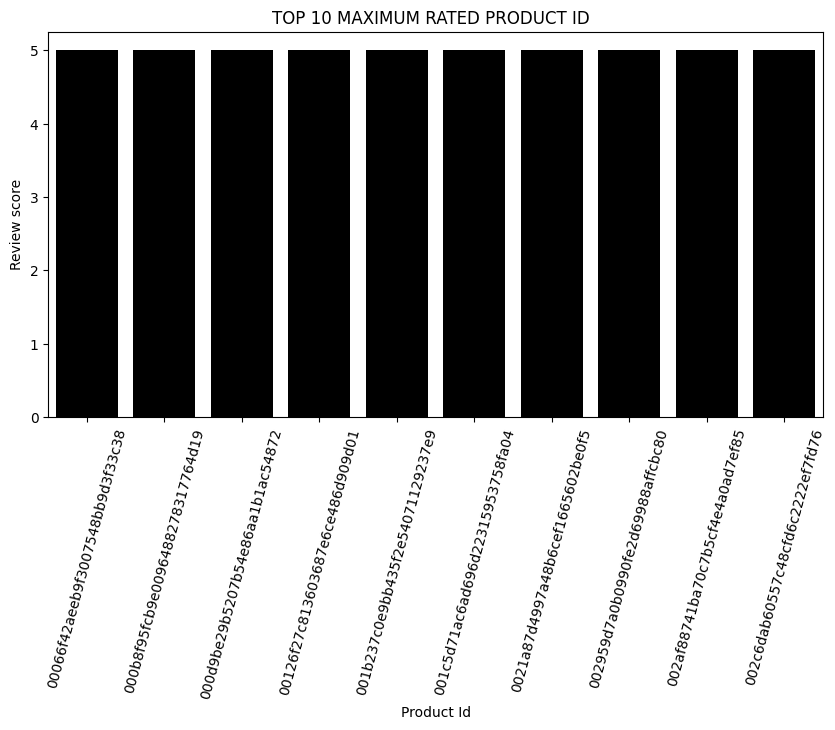

In [289]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=max_rate_prod, x= 'product_id', y='review_score', color='black')
plt.xlabel("Product Id")
plt.ylabel("Review score")
plt.xticks(rotation=75)
plt.title('TOP 10 MAXIMUM RATED PRODUCT ID  ')
plt.show()

In [291]:
min_rate_prod

,review_score
product_id,
0009406fd7479715e4bef61dd91f2462,1.0
0011c512eb256aa0dbbb544d8dffcf6e,1.0
002d4ea7c04739c130bb74d7e7cd1694,1.0
0043c62d00db47eff6a6bc4cf6bfaeda,1.0
0043d1a25ef08fb6f41b8fa6f91742ab,1.0
0060b415594c5e1200324ef1a18493c4,1.0
00cf06147ed4880ec5fbba2adbb20e1d,1.0
00e62bcf9337ca4c5d5b4c5c8188f8d2,1.0
00efb9a8ce0cf3b2f37892ab003edc10,1.0


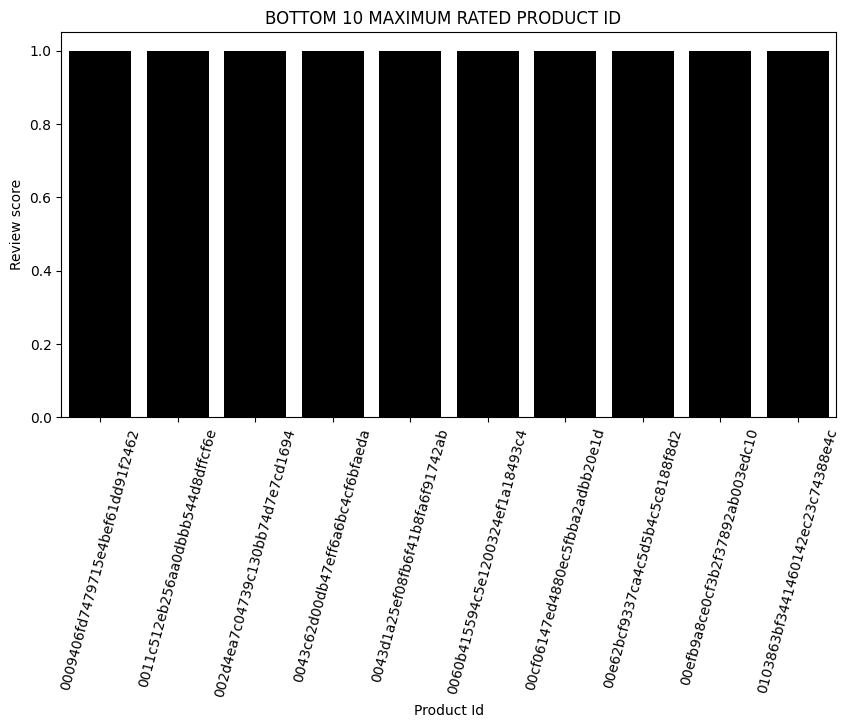

In [293]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=min_rate_prod, x= 'product_id', y='review_score', color='black')
plt.xlabel("Product Id")
plt.ylabel("Review score")
plt.xticks(rotation=75)
plt.title('BOTTOM 10 MAXIMUM RATED PRODUCT ID  ')
plt.show()

In [ ]:
# c. Average rating by location, seller, product, category, month etc.

In [283]:
# Average rating by location
state_review = df.groupby("customer_state")[["review_score"]].mean()
state_review

,review_score
customer_state,
Andhra Pradesh,3.994994
Arunachal Pradesh,4.023421
Chhattisgarh,4.032053
Delhi,4.029721
Goa,4.800000
Gujarat,4.038966
Haryana,4.114633
Himachal Pradesh,3.988598
Jammu & Kashmir,4.008239


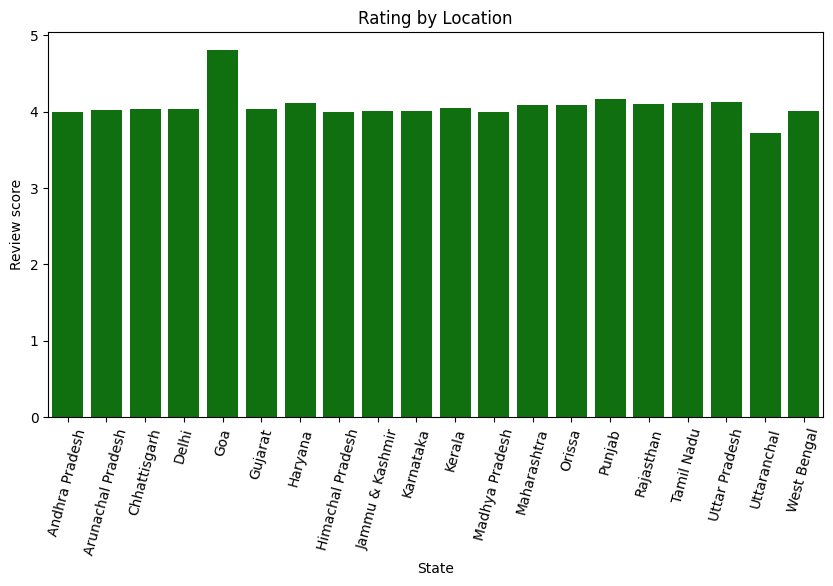

In [297]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=state_review, x= "customer_state", y='review_score', color='green')
plt.xlabel("State")
plt.ylabel("Review score")
plt.xticks(rotation=75)
plt.title('Rating by Location')
plt.show()

In [285]:
#Average Rating by Month
month_review = df_1.groupby("Month")[["review_score"]].mean()
month_review

,review_score
Month,
April,4.037806
August,4.202208
December,3.933394
February,3.789673
January,3.943099
July,4.169644
June,4.156110
March,3.780078
May,4.116526


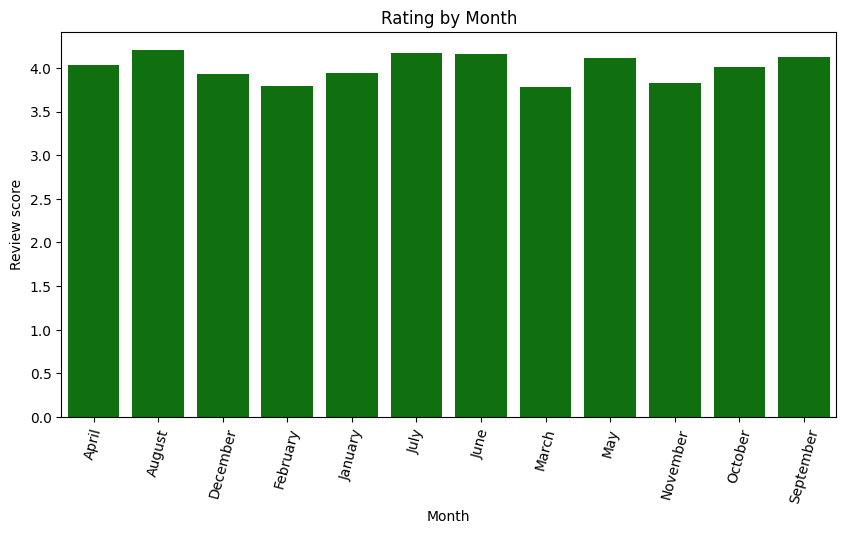

In [299]:
plt.figure(figsize=(10,5))
fig=sns.barplot(data=month_review, x= "Month", y='review_score', color='green')
plt.xlabel("Month")
plt.ylabel("Review score")
plt.xticks(rotation=75)
plt.title('Rating by Month')
plt.show()